C:\Users\LEGION\.conda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30952 (\N{CJK UNIFIED IDEOGRAPH-78E8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\LEGION\.conda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25439 (\N{CJK UNIFIED IDEOGRAPH-635F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\LEGION\.conda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 28145 (\N{CJK UNIFIED IDEOGRAPH-6DF1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\LEGION\.conda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\LEGION\.conda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) miss

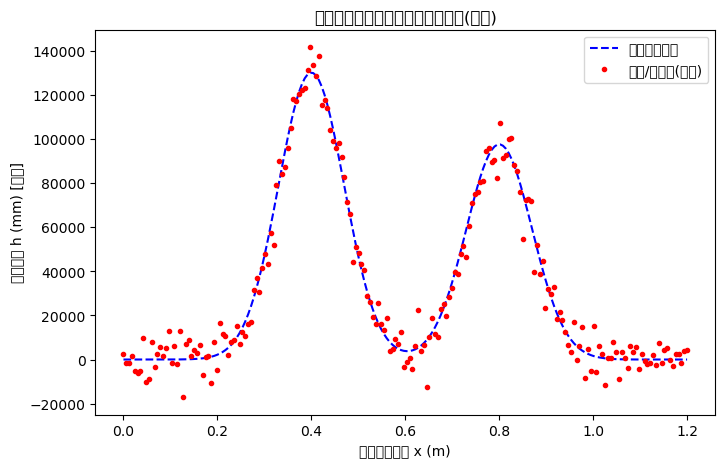

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 假设踏步宽度1.2m，从0到1.2
x = np.linspace(0, 1.2, 200)

# 假设并排行走：两个高斯峰
# 峰1：中心0.4，峰值约0.8; 峰2：中心0.8，峰值约0.6
# 这里只是概率分布f(x)，后续与总N乘可得到某处踩踏次数
def gauss(x, mu, sigma, A):
    return A * np.exp(-0.5*((x-mu)/sigma)**2)

f1 = gauss(x, mu=0.4, sigma=0.07, A=0.8)
f2 = gauss(x, mu=0.8, sigma=0.07, A=0.6)

# 归一化
f_total = f1 + f2
f_total = f_total / np.trapz(f_total, x)  # 积分归一化到1

# 假设某些材料参数和总踩踏次数N，得到磨损深度h(x)
# 这里设h(x)与f_total(x)成正比
N = 1e7  # 1000万次踩踏示例
# 假定某个系数C使中心磨损约8mm
# 我们先试随机定个C=0.004 (仅示例)
C = 0.004
h = C * N * f_total

# 加一点随机噪声模拟测量
noise = np.random.normal(0, 0.05*np.max(h), size=len(x))
h_measured = h + noise

# 绘图
plt.figure(figsize=(8,5))
plt.plot(x, h, 'b--', label='理论磨损曲线')
plt.plot(x, h_measured, 'r.', label='观测/测量点(模拟)')
plt.xlabel('踏步宽度坐标 x (m)')
plt.ylabel('磨损深度 h (mm) [示意]')
plt.title('楼梯踏面宽度方向的磨损分布示例(双峰)')
plt.legend()
plt.show()


平均磨损量 d_avg = 39.150983 (示例单位)


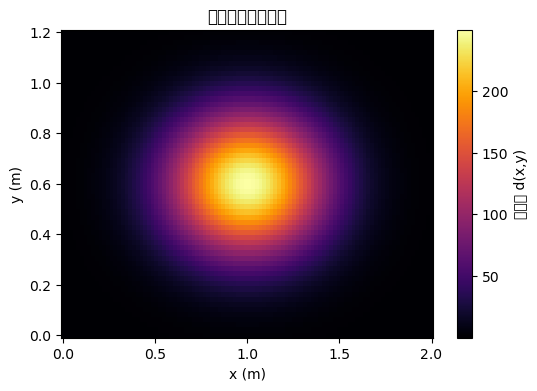

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# -------------------------------
# 1. 初始化参数
# -------------------------------
T = 50            # 楼梯使用年限(年)
N_day = 500       # 每日通行人数
G = 100           # 平均接触压力(N)
k_m = 1e-4        # 材料磨损系数(示例值)

# 楼梯的空间离散：假设踏面区域为 2.0m x 1.2m
x_min, x_max = 0.0, 2.0
y_min, y_max = 0.0, 1.2
nx, ny = 100, 60    # 网格分辨率

x_vals = np.linspace(x_min, x_max, nx)
y_vals = np.linspace(y_min, y_max, ny)
X, Y = np.meshgrid(x_vals, y_vals)

# -------------------------------
# 2. 定义 D(x,y)
# -------------------------------
# 简化假设：在楼梯中央区域( x=1.0, y=0.6 )附近为常走区域
# 用一个2D高斯分布来模拟位置权重因子
def D_xy(x, y, x0=1.0, y0=0.6, sigma_x=0.3, sigma_y=0.2):
    """ 使用高斯分布来模拟位置权重因子 D(x,y) """
    return np.exp(-(((x - x0)**2)/(2*sigma_x**2) + ((y - y0)**2)/(2*sigma_y**2)))

# 在网格上计算 D(x,y)
D_grid = D_xy(X, Y)

# -------------------------------
# 3. 计算 d(x,y)
# -------------------------------
# d(x,y) = T * N_day * G * k_m * D(x,y)
d_grid = T * N_day * G * D_grid * k_m

# -------------------------------
# 4. 可视化并计算平均磨损量 d_avg
# -------------------------------
plt.figure(figsize=(6, 4))
plt.pcolormesh(X, Y, d_grid, cmap='inferno', shading='auto')
plt.colorbar(label='磨损量 d(x,y)')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('楼梯踏面磨损分布')

# 数值积分来近似平均磨损量
dx = (x_max - x_min) / (nx - 1)
dy = (y_max - y_min) / (ny - 1)
area = (x_max - x_min) * (y_max - y_min)

d_sum = np.sum(d_grid) * dx * dy
d_avg = d_sum / area

print(f"平均磨损量 d_avg = {d_avg:.6f} (示例单位)")

plt.show()


C:\Users\LEGION\.conda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22810 (\N{CJK UNIFIED IDEOGRAPH-591A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\LEGION\.conda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\LEGION\.conda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20351 (\N{CJK UNIFIED IDEOGRAPH-4F7F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\LEGION\.conda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29992 (\N{CJK UNIFIED IDEOGRAPH-7528}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\LEGION\.conda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22330 (\N{CJK UNIFIED IDEOGRAPH-573A}) miss

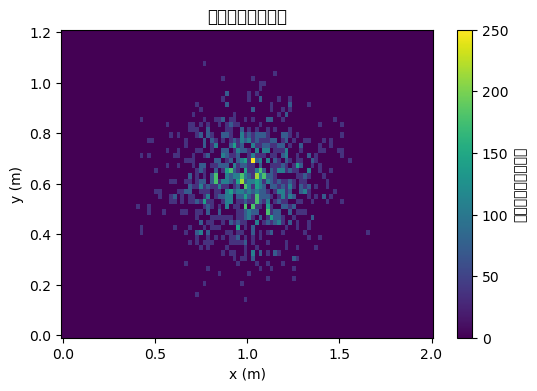

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# 1. 初始化相同的楼梯参数
# -------------------------------
T = 50
N_day = 500
G = 100
k_m = 1e-4

x_min, x_max = 0.0, 2.0
y_min, y_max = 0.0, 1.2
nx, ny = 100, 60
x_vals = np.linspace(x_min, x_max, nx)
y_vals = np.linspace(y_min, y_max, ny)
X, Y = np.meshgrid(x_vals, y_vals)

# -------------------------------
# 2. 模拟多人轨迹
# -------------------------------
num_people = 1000  # 同一时段(或单位时间内)通过楼梯的人数
# 为简单示例，假设这些轨迹在楼梯中央(1.0, 0.6)附近，正态分布
positions_x = np.random.normal(loc=1.0, scale=0.2, size=num_people)
positions_y = np.random.normal(loc=0.6, scale=0.15, size=num_people)

# 建立一个网格矩阵来累计“足迹”计数
footprint_grid = np.zeros((ny, nx))

for px, py in zip(positions_x, positions_y):
    # 用 searchsorted 找到 px, py 对应在网格中的最近索引
    ix = np.searchsorted(x_vals, px)
    iy = np.searchsorted(y_vals, py)
    # 如果超出范围则忽略
    if 0 <= ix < nx and 0 <= iy < ny:
        footprint_grid[iy, ix] += 1

# -------------------------------
# 3. 归一化足迹，并计算磨损量
# -------------------------------
footprint_grid_norm = footprint_grid / footprint_grid.max()  # 归一化到 [0,1]
d_grid_multi = T * N_day * G * k_m * footprint_grid_norm

# -------------------------------
# 4. 可视化
# -------------------------------
plt.figure(figsize=(6, 4))
plt.pcolormesh(X, Y, d_grid_multi, cmap='viridis', shading='auto')
plt.colorbar(label='多人场景下的磨损量')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('多人使用场景模拟')
plt.show()


C:\Users\LEGION\.conda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\LEGION\.conda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38480 (\N{CJK UNIFIED IDEOGRAPH-9650}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\LEGION\.conda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\LEGION\.conda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\LEGION\.conda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25935 (\N{CJK UNIFIED IDEOGRAPH-654F}) miss

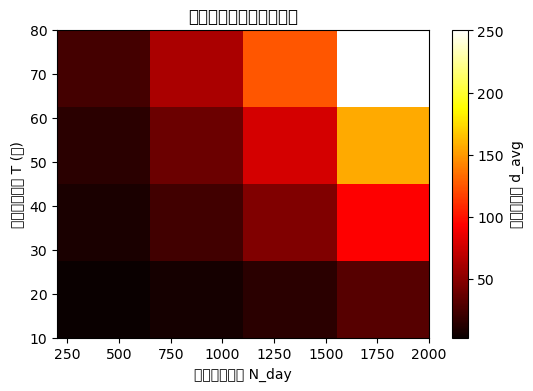

敏感性分析矩阵: (行 -> T, 列 -> N_day)
[[  3.1320786    7.8301965   15.66039301  31.32078602]
 [  9.39623581  23.49058951  46.98117903  93.96235806]
 [ 15.66039301  39.15098252  78.30196505 156.60393009]
 [ 25.05662882  62.64157204 125.28314408 250.56628815]]


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# 1. 先定义一个函数来生成磨损分布 d(x,y)
#    这里直接使用前面高斯分布 D_xy(x,y) 示例
# -------------------------------
def D_xy(x, y, x0=1.0, y0=0.6, sigma_x=0.3, sigma_y=0.2):
    return np.exp(-(((x - x0)**2)/(2*sigma_x**2) + ((y - y0)**2)/(2*sigma_y**2)))

# 网格范围
x_min, x_max = 0.0, 2.0
y_min, y_max = 0.0, 1.2
nx, ny = 100, 60

x_vals = np.linspace(x_min, x_max, nx)
y_vals = np.linspace(y_min, y_max, ny)
X, Y = np.meshgrid(x_vals, y_vals)

D_grid = D_xy(X, Y)

# 网格大小
dx = (x_max - x_min) / (nx - 1)
dy = (y_max - y_min) / (ny - 1)
area = (x_max - x_min) * (y_max - y_min)

# -------------------------------
# 2. 参数范围设定
# -------------------------------
Ts = [10, 30, 50, 80]          # 不同楼梯使用年限
N_days = [200, 500, 1000, 2000]  # 不同每日通行人数

results = np.zeros((len(Ts), len(N_days)))

G = 100       # 固定平均接触压力
k_m = 1e-4    # 固定材料系数

# -------------------------------
# 3. 计算敏感性结果
# -------------------------------
for i, t_val in enumerate(Ts):
    for j, n_val in enumerate(N_days):
        # 计算 d_grid_temp = t_val * n_val * G * k_m * D(x,y)
        d_grid_temp = t_val * n_val * G * k_m * D_grid
        
        # 对网格积分，再求平均
        d_sum_temp = np.sum(d_grid_temp) * dx * dy
        d_avg_temp = d_sum_temp / area
        
        results[i, j] = d_avg_temp

# -------------------------------
# 4. 可视化
#    用imshow 或 pcolormesh 等工具来绘制 (T vs N_day) -> d_avg
# -------------------------------
plt.figure(figsize=(6,4))

# extent: [x_min, x_max, y_min, y_max] 这里 x->N_day, y->T
plt.imshow(results, 
           cmap='hot', 
           origin='lower',
           extent=[min(N_days), max(N_days), min(Ts), max(Ts)],
           aspect='auto')

plt.colorbar(label='平均磨损量 d_avg')
plt.xlabel('每日通行人数 N_day')
plt.ylabel('楼梯使用年限 T (年)')
plt.title('平均磨损量的敏感性分析')
plt.show()

print("敏感性分析矩阵: (行 -> T, 列 -> N_day)")
print(results)


平均磨损量 d_avg = 39.150983 (示例单位)


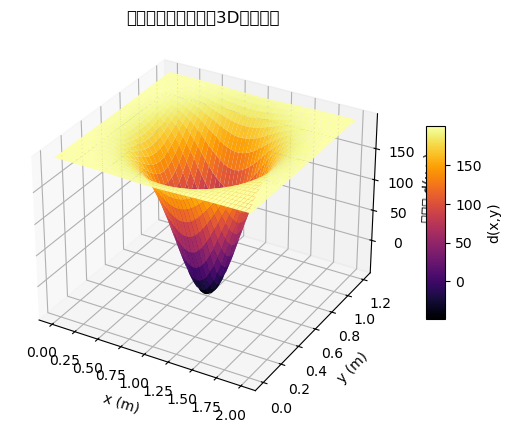

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 导入 3D 坐标轴工具

# -------------------------------
# 1. 初始化参数
# -------------------------------
T = 50            # 楼梯使用年限(年)
N_day = 500       # 每日通行人数
G = 100           # 平均接触压力(N)
k_m = 1e-4        # 材料磨损系数(示例值)

# 楼梯的空间离散：假设踏面区域为 2.0m x 1.2m
x_min, x_max = 0.0, 2.0
y_min, y_max = 0.0, 1.2
nx, ny = 100, 60    # 网格分辨率

x_vals = np.linspace(x_min, x_max, nx)
y_vals = np.linspace(y_min, y_max, ny)
X, Y = np.meshgrid(x_vals, y_vals)

# -------------------------------
# 2. 定义 D(x,y)
# -------------------------------
def D_xy(x, y, x0=1.0, y0=0.6, sigma_x=0.3, sigma_y=0.2):
    """
    使用高斯分布来模拟位置权重因子 D(x,y) 
    x0, y0 为高斯分布中心
    sigma_x, sigma_y 控制分布宽度
    """
    return np.exp(-(((x - x0)**2)/(2*sigma_x**2) + ((y - y0)**2)/(2*sigma_y**2)))

# 在网格上计算 D(x,y)
D_grid = D_xy(X, Y)

# -------------------------------
# 3. 计算 d(x,y)
# -------------------------------
# d(x,y) = T * N_day * G * k_m * D(x,y)
d_grid = T * N_day * G * D_grid * k_m

# -------------------------------
# 4. 计算平均磨损量 d_avg
# -------------------------------
dx = (x_max - x_min) / (nx - 1)
dy = (y_max - y_min) / (ny - 1)
area = (x_max - x_min) * (y_max - y_min)

d_sum = np.sum(d_grid) * dx * dy
d_avg = d_sum / area

print(f"平均磨损量 d_avg = {d_avg:.6f} (示例单位)")

# -------------------------------
# 5. 3D 表面绘图
# -------------------------------
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')

# 画出3D曲面
surf = ax.plot_surface(X, Y, 200-d_grid, 
                       cmap='inferno',   # 颜色映射
                       edgecolor='none') # 边界线可设为'none'更美观

# 设置坐标轴与标题
ax.set_title('楼梯踏面磨损分布（3D表面图）')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('磨损量 d(x,y)')

# 添加颜色条
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='d(x,y)')

# 可根据需要调整视角（仰角、方位角）
# ax.view_init(elev=30, azim=-60)

plt.show()


In [9]:
// 通过 getScript 动态加载 SimplexNoise 库
$.getScript(
  'https://fastly.jsdelivr.net/npm/simplex-noise@2.4.0/simplex-noise.js'
).done(function () {
  // 进入 .done(...) 回调函数后，表示脚本加载已完成

  // -------------------------------
  // 1. 初始化记录“磨损量”的全局最小值和最大值
  //    用于后续可视化映射的区间
  // -------------------------------
  var valMin = Infinity;   // 初始化最小值为正无穷
  var valMax = -Infinity;  // 初始化最大值为负无穷

  // -------------------------------
  // 2. 定义一个函数 generateStairData()
  //    来计算“原始楼梯磨损数据”
  // -------------------------------
  function generateStairData() {
    // 2.1. 设定一些楼梯使用参数 (可根据实际需要调整)
    var T = 50;       // 楼梯使用年限(年)
    var N_day = 500;  // 每日通行人数
    var G = 100;      // 平均接触压力(N)
    var k_m = 1e-4;   // 材料磨损系数(示例值)

    // 2.2. 我们在 0~50 的二维网格上模拟楼梯踏面
    //      x0, y0 是高斯分布中心
    var x0 = 25, y0 = 25;    // 令中心在(25, 25)
    var sigma_x = 10, sigma_y = 7; // 高斯分布的标准差，控制分布宽度

    // 2.3. 用一个数组 dataOriginal 存放原始的 [x, y, d_ij] 数据
    var dataOriginal = [];

    // 2.4. 遍历 x, y 范围 (这里 0 到 50，包含 51 个整数)
    for (var i = 0; i <= 50; i++) {
      for (var j = 0; j <= 50; j++) {
        // 2.4.1. 计算位置权重因子 D_ij (2D 高斯)
        var D_ij = Math.exp(
          -(
            ((i - x0) * (i - x0)) / (2 * sigma_x * sigma_x) +
            ((j - y0) * (j - y0)) / (2 * sigma_y * sigma_y)
          )
        );

        // 2.4.2. 计算楼梯磨损量 d_ij = T * N_day * G * k_m * D_ij
        var d_ij = T * N_day * G * k_m * D_ij;

        // 2.4.3. 更新全局最小值和最大值
        if (d_ij < valMin) {
          valMin = d_ij;
        }
        if (d_ij > valMax) {
          valMax = d_ij;
        }

        // 2.4.4. 将计算结果 [x, y, d_ij] 存入 dataOriginal
        dataOriginal.push([i, j, d_ij]);
      }
    }
    // 2.5. 返回生成的原始数据数组
    return dataOriginal;
  }

  // -------------------------------
  // 3. 调用 generateStairData() 并打印原始最小值和最大值
  // -------------------------------
  var dataOriginal = generateStairData();  
  console.log('Original valMin: ' + valMin, 'valMax: ' + valMax);

  // -------------------------------
  // 4. 在这里进行“反转”操作
  //    将 d_ij -> d_inverted = valMax - d_ij
  //    这样可使原先 d_ij = valMax -> d_inverted=0
  //    而原先 d_ij = valMin -> d_inverted = valMax - valMin
  // -------------------------------
  var dataInverted = [];      // 新的“倒转”后数据
  var newMin = Infinity;      // 反转后新的最小值
  var newMax = -Infinity;     // 反转后新的最大值

  // 4.1. 遍历原始的 dataOriginal
  for (var k = 0; k < dataOriginal.length; k++) {
    var x = dataOriginal[k][0];   // 原始 x 坐标
    var y = dataOriginal[k][1];   // 原始 y 坐标
    var dVal = dataOriginal[k][2]; // 原始磨损量

    // 4.2. 进行反转运算: d_inverted = valMax - dVal
    var dInv = valMax - dVal;

    // 4.3. 更新新的最小值 newMin、最大值 newMax
    if (dInv < newMin) {
      newMin = dInv;
    }
    if (dInv > newMax) {
      newMax = dInv;
    }

    // 4.4. 存入 dataInverted (用 [x, y, d_inverted] 格式)
    dataInverted.push([x, y, dInv]);
  }

  // 4.5. 打印最终反转后的新最值
  console.log('Inverted newMin: ' + newMin, 'newMax: ' + newMax);

  // -------------------------------
  // 5. 使用 ECharts 3D bar3D 来可视化“反转后的”数据 dataInverted
  // -------------------------------
  myChart.setOption(
    (option = {
      // 5.1. visualMap：负责颜色映射
      //      将范围设为 newMin~newMax
      visualMap: {
        show: false,       // 不显示可交互的 visualMap 面板
        min: newMin,       // 反转后数据的最小值
        max: newMax,       // 反转后数据的最大值
        inRange: {
          // 定义颜色渐变序列，可自行修改
          color: [
             '#ffffcc', // 浅黄
            '#ffff99', // 较浅黄
            '#ffff66', // 中浅黄
            '#ffff33', // 中黄
            '#ffff00', // 纯黄
            '#ffcc00', // 金黄
            '#ff9900', // 橙黄
            '#ff6600', // 深橙黄
            '#ff3300', // 橙红
          ]
        }
      },
      // 5.2. 定义三维坐标轴
      xAxis3D: {
        type: 'value',
        name: 'X'  // X 轴标签
      },
      yAxis3D: {
        type: 'value',
        name: 'Y'  // Y 轴标签
      },
      zAxis3D: {
        type: 'value',
        name: 'd_inverted', // Z 轴标签
        // 下方使用函数来自动适配当前数据的 min/max
        max: function (val) {
          return val.max;
        },
        min: function (val) {
          return val.min;
        }
      },
      grid3D: {
        // 3D 网格的一些视觉样式
        axisLine: {
          lineStyle: { color: '#fff' } // 坐标轴线的颜色
        },
        axisPointer: {
          lineStyle: { color: '#fff' } // 光标指示器的颜色
        },
        // 视角控制
        viewControl: {
          // autoRotate: true, // 是否自动旋转
        },
        // 光照设置
        light: {
          main: {
            shadow: true,       // 是否开启阴影
            quality: 'ultra',   // 光照质量：low, medium, high, ultra
            intensity: 1.5      // 光照强度
          }
        }
      },
      // 5.3. 系列配置: bar3D 柱状3D
      series: [
        {
          type: 'bar3D',
          data: dataInverted,   // 使用“反转”后的数据
          shading: 'lambert',   // 使用 lambert 光照模型
          label: {
            // 可选: 显示标签, 格式化数值
            formatter: function (param) {
              // param.value[2] 即 d_inverted
              return param.value[2].toFixed(4);
            }
          },
          // barSize 决定柱子的粗细（在 x,y 平面上的占比）
          barSize: 1
        }
      ]
    })
  );
});


SyntaxError: invalid syntax (2482393455.py, line 1)

C:\Users\LEGION\.conda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19977 (\N{CJK UNIFIED IDEOGRAPH-4E09}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\LEGION\.conda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32500 (\N{CJK UNIFIED IDEOGRAPH-7EF4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\LEGION\.conda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27004 (\N{CJK UNIFIED IDEOGRAPH-697C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\LEGION\.conda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26799 (\N{CJK UNIFIED IDEOGRAPH-68AF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\LEGION\.conda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30952 (\N{CJK UNIFIED IDEOGRAPH-78E8}) miss

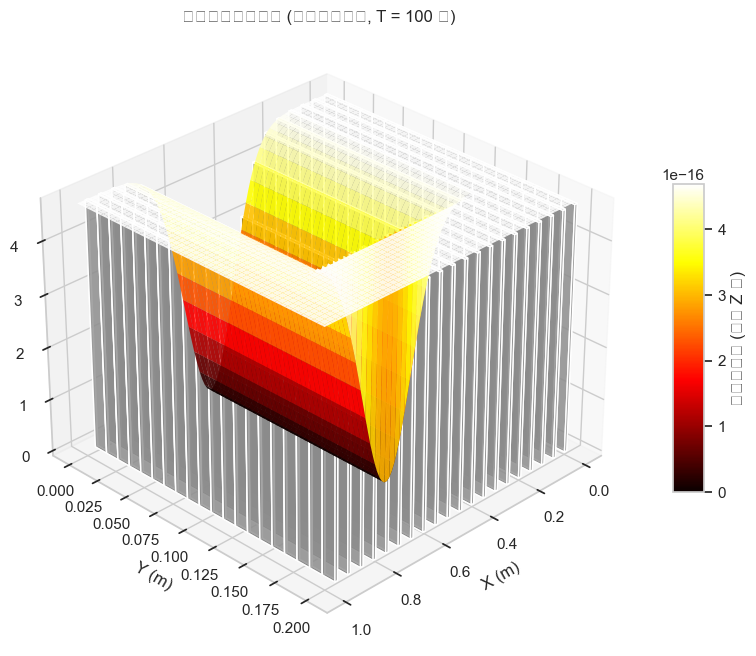

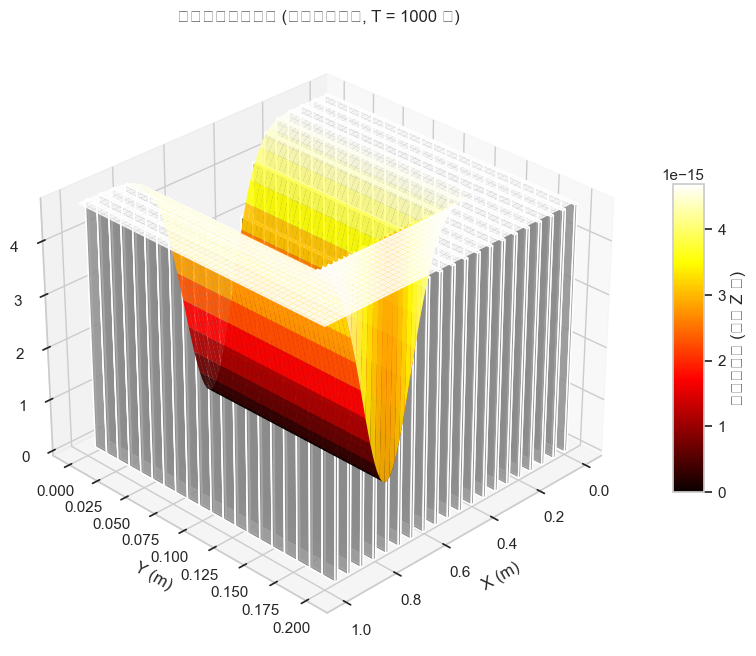

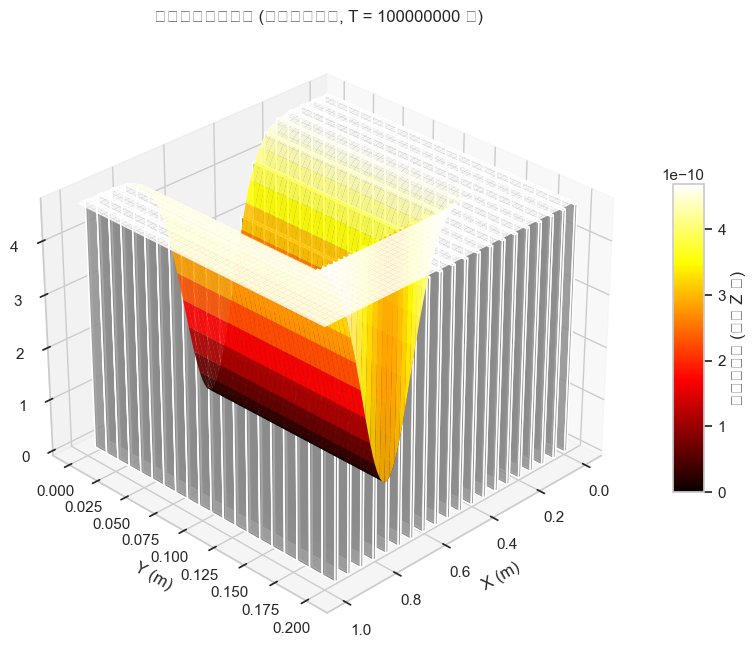

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# -------------------------------
# 1. 初始化参数
# -------------------------------
# 输入参数
N_day = 260       # 每日通行人数
K = 1.8e-7        # 材料的磨损因数
d_step = 8.8e-6    # 步伐滑动距离
H = 175e6         # 材料硬度
mu = 0.5          # 平均接触压力(N)
sigma = 0.1       # 标准差
X_length = 1      # 楼梯的x方向长度（1米）
Y_length = 0.2    # 楼梯的y方向宽度（0.2米）

# 磨损系数
k_m = K * d_step / H

# 定义网格
x_vals = np.linspace(0, X_length, 100)
y_vals = np.linspace(0, Y_length, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# -------------------------------
# 2. 定义 D(x, y)
# -------------------------------
def D(x, y):
    """
    定义位置权重因子 D(x, y)
    如果 y 在 (0, 0.15) 范围内，取 N(0.5, sigma^2)
    如果 y 在 (0.15, 0.2) 范围内，取 0
    """
    if 0 <= y <= 0.15:
        return np.exp(-((x - 0.5)**2) / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))
    elif 0.15 < y <= 0.2:
        return 0
    else:
        return 0

# 向量化 D 函数以提高效率
D_vectorized = np.vectorize(D)
D_grid = D_vectorized(X, Y)

# -------------------------------
# 3. 定义磨损量 d(x, y)
# -------------------------------
def d_wear(T, N_day, G, D, k_m):
    """
    磨损量公式 d(x, y) = T * N_day * G * D(x, y) * k_m
    """
    return T * N_day * G * D * k_m

# -------------------------------
# 4. 绘制三维楼梯磨损分布
# -------------------------------
T_values = [100, 1000, 10**8]  # 使用年限的不同值
G = mu  # 平均接触压力(N)

# 下采样的步长
step = 5  # 每隔 5 个点采样一个

# 设置 Seaborn 主题
sns.set(style="whitegrid")

for T in T_values:
    d_grid = d_wear(T, N_day, G, D_grid, k_m)
    
    # 反转 Z 轴值（可选）
    d_grid_inverted = d_grid.max() - d_grid
    
    # 创建三维绘图
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # 使用 Seaborn 的调色板
    cmap = sns.color_palette("hot", as_cmap=True)

    # 统一归一化
    norm = plt.Normalize(vmin=d_grid_inverted.min(), vmax=d_grid_inverted.max())

    # 创建一个 ScalarMappable，用于颜色条
    mappable = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
    mappable.set_array(d_grid_inverted)

    # 绘制3D表面，使用反转后的磨损量
    surf = ax.plot_surface(X, Y, d_grid_inverted, cmap=cmap, norm=norm, edgecolor='none', alpha=0.9)

    # 准备柱体的颜色
    colors = cmap(norm(d_grid_inverted[::step, ::step])).reshape(-1, 4)  # 获取 RGBA 颜色

    # 获取下采样后的坐标和高度
    X_sub = X[::step, ::step].flatten()
    Y_sub = Y[::step, ::step].flatten()
    Z_sub = np.zeros_like(X_sub)  # 柱体底部位置
    dx = dy = 0.01  # 柱体尺寸
    dz = d_grid_inverted[::step, ::step].flatten()

    # 绘制柱体
    ax.bar3d(
        X_sub, Y_sub, Z_sub,  # 柱体底部位置
        dx, dy, dz,  # 柱体尺寸
        color=colors,  # 颜色映射
        alpha=0.6
    )

    # 添加颜色条
    cbar = fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=10, label='反转磨损量 (倒转 Z 轴)')

    # 设置坐标轴标签
    ax.set_xlabel('X (m)')
    ax.set_ylabel('Y (m)')
    ax.set_zlabel('d_inverted(x, y)')
    ax.set_title(f'三维楼梯磨损分布 (柱体颜色映射, T = {T} 年)')

    # 调整视角以获得更好的视觉效果
    ax.view_init(elev=30, azim=45)

    plt.show()


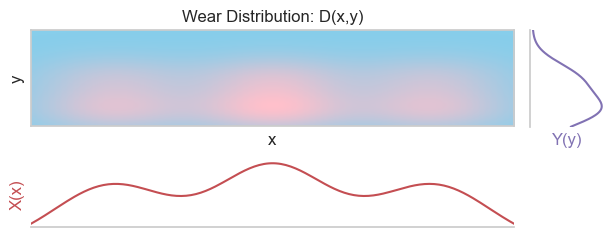

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap

T=100
N_d=260
G=700
K=1.8e-7
d=8e-4
H=175e6

# 1) 定义自定义Colormap: 从天蓝(#87CEEB)到粉色(#FFC0CB)
cmap_blue_pink = LinearSegmentedColormap.from_list(
    'blue_pink',  # colormap 名字，可自定
    ['#87CEEB', '#FFC0CB']
)
############################################
# 1.  假设我们有如下函数来给出：
#     - 2D 热力图数据 f2d
#     - 一维分布 X(x) 与 Y(y)
############################################
def X(x):
    """示例: 人为定义的 3个高斯混合, 仅供演示."""
    from math import exp, sqrt, pi
    # (此处写死, 真实场景可替换成您自己的 X(x))
    w = [0.3, 0.4, 0.3]
    mu= [1.0, 3.0, 5.0]
    s = [0.7, 0.7, 0.7]
    total = 0
    for i in range(3):
        total += w[i]*(1/(sqrt(2*pi)*s[i]))*exp(-0.5*((x-mu[i])/s[i])**2)
    return total

def Y(y):
    """示例: 人为定义的 2个高斯混合, 仅供演示."""
    from math import exp, sqrt, pi
    w = [0.4, 0.6]
    mu= [3.0, 1.0]
    s = [1.0, 1.0]
    total = 0
    for j in range(2):
        total += w[j]*(1/(sqrt(2*pi)*s[j]))*exp(-0.5*((y-mu[j])/s[j])**2)
    return total

def f2d_func(x, y):
    """示例: 6个二维可分离高斯的混合, 仅供演示."""
    return X(x)*Y(y)

############################################
# 2.  生成网格并计算 2D 分布 (f2d)
############################################
Nx, Ny = 80, 80
xs = np.linspace(0, 6, Nx)
ys = np.linspace(0, 6, Ny)

f2d = np.zeros((Nx, Ny))
for i, xv in enumerate(xs):
    for j, yv in enumerate(ys):
        f2d[i,j] = f2d_func(xv, yv)  # 计算二维密度

############################################
# 3.  分别计算 X(x), Y(y) 采样用于画边缘曲线
############################################
x_curve = np.linspace(0, 6, 200)
X_vals = [X(xx) for xx in x_curve]

y_curve = np.linspace(0, 6, 200)
Y_vals = [Y(yy) for yy in y_curve]

############################################
# 4.  使用 GridSpec 创建主图+子图布局
############################################
fig = plt.figure(figsize=(8,8))

# 定义一个 2行x2列的网格:
#   行高比: [4,1]  => 第一行(主图)比第二行( X 分布) 高4倍
#   列宽比: [4,1]  => 第一列(主图)比第二列( Y 分布) 宽4倍
gs = gridspec.GridSpec(
    nrows=2, ncols=2, 
    height_ratios=[8,1],
    width_ratios=[4,1],
    wspace=0.05,  # 子图间水平间隔
    hspace=0.05   # 子图间垂直间隔
)

# 主图: 放在 [0,0], 大块区域
main_ax  = fig.add_subplot(gs[0,0])

# X 的分布图: 放在 [1,0], 与主图共享 X 轴 (sharex)
xDist_ax = fig.add_subplot(gs[1,0], sharex=main_ax)

# Y 的分布图: 放在 [0,1], 与主图共享 Y 轴 (sharey)
yDist_ax = fig.add_subplot(gs[0,1], sharey=main_ax)

# 网格[1,1] 位置留空(或者可做别的)
# gs[1,1] 可不用

############################################
# 5.  在 main_ax 上绘制 2D heatmap
############################################
heatmap = main_ax.imshow(f2d.T,
                         origin='lower',
                         extent=[xs[0], xs[-1], ys[0], ys[-1]],
                         aspect='auto',
                         cmap=cmap_blue_pink  # 使用自定义的蓝→粉渐变
                         )
main_ax.set_xlabel("x")
main_ax.set_ylabel("y")

# 2) 设置纵横比: aspect < 1 => Y 轴被“压缩”
main_ax.set_aspect(0.2, adjustable='box')

main_ax.set_title("Wear Distribution: D(x,y)")


############################################
# 6. 在 xDist_ax 上画 X(x) [随 x 的一维曲线]
#    注意: 它与主图共用 X 轴 => xDist_ax 的 x范围与 main_ax 相同
############################################
xDist_ax.plot(x_curve, X_vals, 'r-')
xDist_ax.set_xlim(xs[0], xs[-1])  # 以防万一
xDist_ax.set_xticks([])
xDist_ax.set_yticks([])
# 我们通常只想显示 xDist_ax 上的 Y 轴, 但让它倒置, 
# 这样看起来就像是贴在主图 x 轴下方
#xDist_ax.invert_yaxis()  
xDist_ax.set_ylabel("X(x)", color='r') 
# 可能不需要再写 xDist_ax.set_xlabel, 因为主图已有 x label

# 隐藏多余的刻度(可选)
#plt.setp(xDist_ax.get_xticklabels(), visible=False)
#xDist_ax.tick_params(axis='x', which='both', length=0)
# 只保留某一条边框，其余全部隐藏
xDist_ax.spines['top'].set_visible(False)
xDist_ax.spines['right'].set_visible(False)
xDist_ax.spines['left'].set_visible(False)
pos = xDist_ax.get_position()  # 返回 [x0, y0, width, height]
# 往下移动 0.05
xDist_ax.set_position([pos.x0, pos.y0 + 0.25, pos.width, pos.height])
# 这样 xDist_ax 只剩下 bottom 这条边框可见
############################################
# 7. 在 yDist_ax 上画 Y(y) [随 y 的一维曲线]
#    此时我们希望横坐标表示 "pdf", 纵坐标与主图共用
############################################

yDist_ax.plot(Y_vals, y_curve, 'm-')
yDist_ax.set_xticks([])
yDist_ax.set_yticks([])
# 共享了 main_ax 的 y范围
yDist_ax.set_ylim(ys[0], ys[-1])
#yDist_ax.invert_xaxis()  # 让分布朝左延伸
yDist_ax.set_xlabel("Y(y)", color='m')
# 同理, 隐藏多余刻度
#plt.setp(xDist_ax.get_xticklabels(), visible=False)
#yDist_ax.tick_params(axis='y', which='both', length=0)
yDist_ax.spines['top'].set_visible(False)
#yDist_ax.spines['left'].set_visible(False)
yDist_ax.spines['bottom'].set_visible(False)
yDist_ax.spines['right'].set_visible(False)

pos = yDist_ax.get_position()  # 返回一个 Bbox 对象
# 以 pos.x0, pos.y0, pos.width, pos.height 形式获取数值
x0 = pos.x0
y0 = pos.y0
w0 = pos.width
h0 = pos.height

# 计算新的宽度 new_width
new_height = h0 / 5.5  # 举例：缩小到原来的 1/5
new_weight = w0 / 1.6
# 也可以在这里加一些修正，让 x0+x1 不与主图重叠:
# x0 += (w0 - new_width)

# 最后，必须用set_position()传入一个四元list或tuple
yDist_ax.set_position([x0, y0+0.273, new_weight, new_height])
# 仅 right spine 可见
############################################
# 8. 显示
############################################
plt.show()


Global min: 4.3029641691689554e-10  Global max: 3.336596101795642e-08


AttributeError: 'function' object has no attribute 'set_aspect'

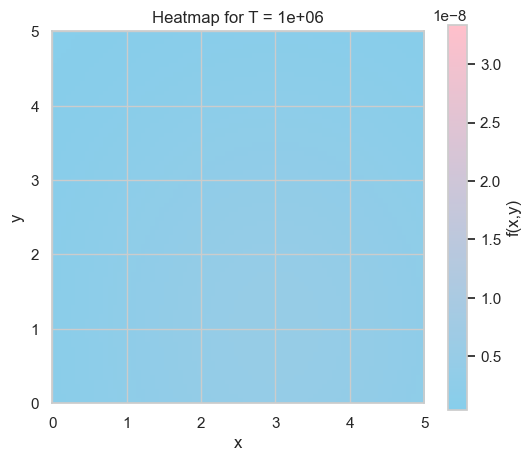

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
# 1) 定义自定义Colormap: 从天蓝(#87CEEB)到粉色(#FFC0CB)
cmap_blue_pink = LinearSegmentedColormap.from_list(
    'blue_pink',  # colormap 名字，可自定
    ['#87CEEB', '#FFC0CB']
)
T=100
N_d=260
G=700
K=1.8e-7
d=8e-4
H=175e6
k_m=N_d*G*K*d/H
# 1) 定义自定义Colormap: 从天蓝(#87CEEB)到粉色(#FFC0CB)
cmap_blue_pink = LinearSegmentedColormap.from_list(
    'blue_pink',  # colormap 名字，可自定
    ['#87CEEB', '#FFC0CB']
)
############################################
# 1.  假设我们有如下函数来给出：
#     - 2D 热力图数据 f2d
#     - 一维分布 X(x) 与 Y(y)
############################################
def X(x):
    """示例: 人为定义的 3个高斯混合, 仅供演示."""
    from math import exp, sqrt, pi
    # (此处写死, 真实场景可替换成您自己的 X(x))
    w = [0.3, 0.4, 0.3]
    mu= [3.0, 3.0, 3.0]
    s = [2, 2, 2]
    total = 0
    for i in range(3):
        total += w[i]*(1/(sqrt(2*pi)*s[i]))*exp(-0.5*((x-mu[i])/s[i])**2)
    return total

def Y(y):
    """示例: 人为定义的 2个高斯混合, 仅供演示."""
    from math import exp, sqrt, pi
    w = [0.4, 0.6]
    mu= [1.0, 1.0]
    s = [2.5, 2.5]
    total = 0
    for j in range(2):
        total += w[j]*(1/(sqrt(2*pi)*s[j]))*exp(-0.5*((y-mu[j])/s[j])**2)
    return total



T_list = [1e6, 2e6, 3e6, 4e6, 5e6, 7e6]

########################################
# 2. 生成网格
########################################
Nx, Ny = 80, 80
xs = np.linspace(0, 5, Nx)
ys = np.linspace(0, 5, Ny)

########################################
# 3. 依次计算每个 T 下的 f2d(x,y)
#    并收集到 all_data 里
########################################
all_data = []
for T in T_list:
    f2d = np.zeros((Nx, Ny))
    for i, xv in enumerate(xs):
        for j, yv in enumerate(ys):
            f2d[i, j] = X(xv) * Y(yv) * k_m * T
    all_data.append((T, f2d))

########################################
# 4. 找到所有 f2d 的 全局 min/max
########################################
global_min = min( np.min(d) for (_, d) in all_data )
global_max = max( np.max(d) for (_, d) in all_data )

print("Global min:", global_min, " Global max:", global_max)

########################################
# 5. 分别画出 6 张图 (每个 T 一个Figure)
########################################
for T, f2d in all_data:
    plt.figure(figsize=(6,5))  # 建立新的 Figure
    # 绘制 heatmap, 并指定相同的vmin/vmax
    im = plt.imshow(
        f2d.T,
        origin='lower',
        extent=[xs[0], xs[-1], ys[0], ys[-1]],
        cmap=cmap_blue_pink , # 使用自定义的蓝→粉渐变
        vmin=global_min,
        vmax=global_max
    )
    plt.colorbar(im, label="f(x,y)")
    plt.title(f"Heatmap for T = {T:.0e}")
    plt.xlabel("x")
    plt.ylabel("y")
    ax=plt.gca
    ax.set_aspect(0.2, adjustable='box')
    plt.show()  # 显示这一张图；若您只想一次性结束后再看，也可不写

In [19]:
// 1) 先用 getScript 动态载入 simplex-noise.js (如不需要可省略)
$.getScript('https://fastly.jsdelivr.net/npm/simplex-noise@2.4.0/simplex-noise.js')
  .done(function () {
    // 脚本加载完成后，执行以下代码

    // -------------------------------
    // 1. 初始化最值
    // -------------------------------
    var valMin = Infinity;
    var valMax = -Infinity;

    // -------------------------------
    // 2. 定义多重高斯函数 X(x), Y(y)
    //    以及最终  f2d(x,y) = X(x)*Y(y)
    // -------------------------------
    // 2.1 辅助：1D 高斯函数
    function gauss1D(x, mu, sigma) {
      return (1.0 / (sigma * Math.sqrt(2 * Math.PI))) *
             Math.exp(-0.5 * Math.pow((x - mu) / sigma, 2));
    }

    // 2.2 示例：X(x) => 3个高斯混合 (权重 w, 均值 mu, 标准差 s)
    function X_of_x(x) {
      var w = [0.3, 0.4, 0.3];
      var mu= [1.0, 3.0, 5.0];
      var s = [0.7, 0.7, 0.7];
      var total = 0;
      for (var i=0; i<w.length; i++){
        total += w[i] * gauss1D(x, mu[i], s[i]);
      }
      return total;
    }

    // 2.3 示例：Y(y) => 2个高斯混合
    function Y_of_y(y) {
      var w = [0.4, 0.6];
      var mu= [3.0, 1.0];
      var s = [1.0, 1.0];
      var total = 0;
      for (var j=0; j<w.length; j++){
        total += w[j] * gauss1D(y, mu[j], s[j]);
      }
      return total;
    }

    // 2.4 f2d(x,y) = X(x)*Y(y)
    function f2d(x, y) {
      return X_of_x(x) * Y_of_y(y);
    }

    // -------------------------------
    // 3. 生成“原始数据” dataOriginal
    //    这里可以决定 x,y 网格大小 & 范围
    // -------------------------------
    function generateStairData() {
      // 3.1 设定 x,y 的范围
      //     比如与 Python 中类似 [0,6], [0,6]
      var xMin = 0, xMax = 6;
      var yMin = 0, yMax = 6;
      var gridX = 60;  // x方向网格
      var gridY = 60;  // y方向网格

      var dx = (xMax - xMin) / gridX;
      var dy = (yMax - yMin) / gridY;

      // 3.2 如果想跟之前楼梯参数挂钩，这里也可做:
      //     d_ij = T*N_day*G*(k*d/H)* f2d(x,y)
      //     按需开启或调节
      var T     = 100;     // 楼梯使用年限(年)
      var N_day = 260;     // 每日通行人数
      var G     = 700;     // 平均接触压力(N)
      var k     = 1.8e-7;  // 材料磨损系数
      var dStep = 8e-4;    // 步伐滑动距离(m)
      var H     = 1.75e6;  // 材料硬度
      var k_m   = (k * dStep) / H; // 组合系数

      var dataArr = [];

      for (var i = 0; i <= gridX; i++) {
        for (var j = 0; j <= gridY; j++) {
          var xVal = xMin + i * dx;
          var yVal = yMin + j * dy;

          // 计算 f2d(x,y)
          var distVal = f2d(xVal, yVal);

          // 如果要将 distVal 视为“密度”，再乘以楼梯系数 => 磨损量
          var dVal = distVal * T * N_day * G * k_m;

          // 更新全局 min/max
          if (dVal < valMin) valMin = dVal;
          if (dVal > valMax) valMax = dVal;

          // 保存 [x, y, dVal]
          dataArr.push([xVal, yVal, dVal]);
        }
      }
      return dataArr;
    }

    // 3.3 调用
    var dataOriginal = generateStairData();
    console.log("Original valMin=", valMin, " valMax=", valMax);

    // -------------------------------
    // 4. 可选：做反转
    // -------------------------------
    var dataInverted = [];
    var newMin = Infinity, newMax = -Infinity;
    for (var p = 0; p < dataOriginal.length; p++) {
      var x = dataOriginal[p][0];
      var y = dataOriginal[p][1];
      var dVal = dataOriginal[p][2];

      var dInv = valMax - dVal; // 反转

      if (dInv < newMin) newMin = dInv;
      if (dInv > newMax) newMax = dInv;

      dataInverted.push([x, y, dInv]);
    }
    console.log("Inverted newMin=", newMin, " newMax=", newMax);

    // -------------------------------
    // 5. 用 ECharts (bar3D) 可视化 dataInverted
    // -------------------------------
    myChart.setOption(
      (option = {
        visualMap: {
          show: false,
          min: newMin,
          max: newMax,
          inRange: {
            color: [
              '#FFFFFF',
              '#865A50',
              '#6E4A42',
              '#573A33',
              '#442D28',
              '#3C2924',
              '#2C1D1A',
            ]
          }
        },
        backgroundColor: '#ffffff',
        xAxis3D: {
          color:'#00000',
          type: 'value',
          name: 'X'
        },
        yAxis3D: {
          color:'#00000',
          type: 'value',
          name: 'Y'
        },
        zAxis3D: {
          type: 'value',
          name: 'd_inverted',
          max: function (val) { return val.max; },
          min: function (val) { return val.min; }
        },
        grid3D: {
          boxWidth: 150,    // 默认大约是 200，值越大，X 轴看起来越“宽”
          boxDepth: 60,
          boxHeight:40,
          axisLine: { lineStyle: { color: '#000' } },
          axisPointer: { lineStyle: { color: '#000' } },
          viewControl: {
            // autoRotate: true,
          },
          light: {
            main: {
              shadow: true,
              quality: 'ultra',
              intensity: 1.5
            }
          }
        },
        series: [
          {
            type: 'bar3D',
            data: dataInverted,
            shading: 'lambert',
            label: {
              formatter: function (param) {
                return param.value[2].toFixed(4);
              }
            },
            barSize: 1
          }
        ]
      })
    );
});


SyntaxError: invalid syntax (1625504436.py, line 1)

测试集上的MSE:  8.277609255799597
测试集上的R²:  0.92924272041813

线性回归模型的各特征系数:
    Feature  Coefficient
0       Age     0.511077
1    Gender     4.711851
2  Region_A    -8.500596
3  Region_B     6.782534
4  Region_C     1.718062


C:\Users\LEGION\.conda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\LEGION\.conda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 40836 (\N{CJK UNIFIED IDEOGRAPH-9F84}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\LEGION\.conda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20307 (\N{CJK UNIFIED IDEOGRAPH-4F53}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\LEGION\.conda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\LEGION\.conda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) miss

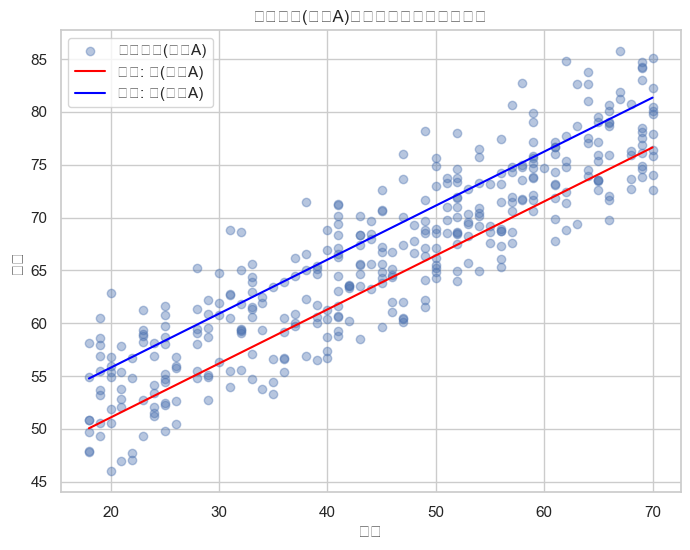

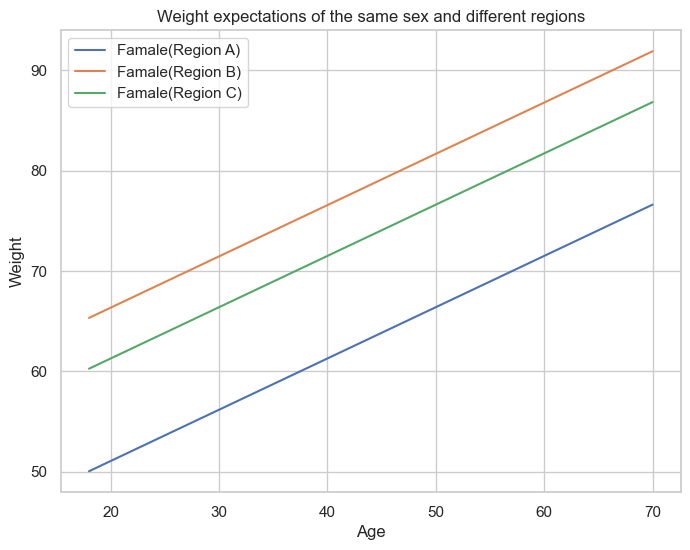

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# ------------------------------
# 1. 数据模拟
# ------------------------------
np.random.seed(42)  # 固定随机种子，便于结果复现

num_samples = 500

# 年龄：随机在 18 ~ 70 之间
ages = np.random.randint(18, 71, size=num_samples)

# 性别：0 表示女性，1 表示男性
genders = np.random.choice([0, 1], size=num_samples, p=[0.5, 0.5])

# 地区：假设有 3 个地区，分别用 A, B, C 表示(A中国 B美国 C南非)
regions = np.random.choice(['A', 'B', 'C'], size=num_samples, p=[0.75, 0.20, 0.05])

# 构造体重的“理论”期望：假设
#   1) 年龄每增加 1 岁，平均体重增加 0.5 kg
#   2) 男性在相同年龄下比女性重 10 kg
#   3) 不同地区可能有不同的基准：A: +0 kg, B: +2 kg, C: -1 kg
#   4) 随机噪声
base_weight = 50  # 假设 18 岁女性在 A 地区的基准体重
weights = (
    base_weight
    + 0.5 * (ages - 18)
    + 5.0 * genders
    + np.where(regions == 'A', 0, 0)  # A地区基准
    + np.where(regions == 'B', 15, 0)  # B地区比A地区平均多2kg
    + np.where(regions == 'C', 10, 0) # C地区比A地区平均少1kg
)

# 加入高斯噪声，使数据更贴近真实场景
noise = np.random.normal(0, 3, size=num_samples)
weights = weights + noise

# 整理成 DataFrame
df = pd.DataFrame({
    'Age': ages,
    'Gender': genders,
    'Region': regions,
    'Weight': weights
})

# ------------------------------
# 2. 特征工程
# ------------------------------
# 地区是类别特征，需要进行One-Hot编码
# 先使用OneHotEncoder对“Region”列进行编码
# 修改点在这里，将sparse=False改为sparse_output=False
ohe = OneHotEncoder(sparse_output=False)  
# reshape(-1,1) 是因为ohe要求数据是二维的
region_encoded = ohe.fit_transform(df[['Region']])  

# One-Hot编码后的列名，例如 ['Region_A', 'Region_B', 'Region_C']
region_encoded_df = pd.DataFrame(region_encoded, columns=ohe.get_feature_names_out(['Region']))

# 将原始DataFrame中去除Region列，然后拼接One-Hot后的DataFrame
df_encoded = pd.concat([df.drop('Region', axis=1), region_encoded_df], axis=1)

# 此时 df_encoded 包含如下列:
# ['Age', 'Gender', 'Weight', 'Region_A', 'Region_B', 'Region_C']

# ------------------------------
# 3. 训练集、测试集划分
# ------------------------------
X = df_encoded.drop('Weight', axis=1)
y = df_encoded['Weight']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------------
# 4. 模型训练（以线性回归为例）
# ------------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# ------------------------------
# 5. 模型评估
# ------------------------------
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("测试集上的MSE: ", mse)
print("测试集上的R²: ", r2)

# 查看训练后的线性回归系数（特征影响权重）
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})
print("\n线性回归模型的各特征系数:")
print(coef_df)

# ------------------------------
# 6. 可视化
# ------------------------------
# 示例1：绘制“年龄 vs 体重”散点图，并用回归模型画出不同性别、地区的预测曲线
# 为了简化演示，我们固定地区为 Region_A（即 Region_B=0, Region_C=0），对性别分开画。
# 当然也可以对所有地区分别画多条曲线。
# ------------------------------

# 函数：给定年龄数组、固定性别、固定地区，输出模型预测
def predict_weight_for_plot(ages_array, gender, region_a=1, region_b=0, region_c=0):
    # 注意：特征顺序要与 X 的列顺序保持一致
    # X.columns = ['Age', 'Gender', 'Region_A', 'Region_B', 'Region_C']
    data_dict = {
        'Age': ages_array,
        'Gender': [gender]*len(ages_array),
        'Region_A': [region_a]*len(ages_array),
        'Region_B': [region_b]*len(ages_array),
        'Region_C': [region_c]*len(ages_array),
    }
    temp_df = pd.DataFrame(data_dict)
    return model.predict(temp_df)

# 选取用于画图的年龄范围
age_line = np.linspace(18, 70, 100)

# 不同性别、固定地区A
pred_female_A = predict_weight_for_plot(age_line, gender=0, region_a=1, region_b=0, region_c=0)
pred_male_A   = predict_weight_for_plot(age_line, gender=1, region_a=1, region_b=0, region_c=0)

plt.figure(figsize=(8, 6))

# 先画出原始散点：只画出在地区A的散点（Region_A=1）
mask_region_A = (df_encoded['Region_A'] == 1)
plt.scatter(df_encoded.loc[mask_region_A, 'Age'],
            df_encoded.loc[mask_region_A, 'Weight'],
            alpha=0.4, label='原始数据(地区A)')

# 画预测曲线
plt.plot(age_line, pred_female_A, color='red', label='预测: 女(地区A)')
plt.plot(age_line, pred_male_A, color='blue', label='预测: 男(地区A)')

plt.xlabel('年龄')
plt.ylabel('体重')
plt.title('不同性别(地区A)下年龄与体重关系的预测')
plt.legend()
plt.show()

# ------------------------------
# 如果想对比地区差异，可以类似地再画曲线
# 比如同时对 A、B、C 区域的“女性”画三条线做对比
# ------------------------------

plt.figure(figsize=(8, 6))

pred_female_A = predict_weight_for_plot(age_line, gender=0, region_a=1, region_b=0, region_c=0)
pred_female_B = predict_weight_for_plot(age_line, gender=0, region_a=0, region_b=1, region_c=0)
pred_female_C = predict_weight_for_plot(age_line, gender=0, region_a=0, region_b=0, region_c=1)

plt.plot(age_line, pred_female_A, label='Famale(Region A)')
plt.plot(age_line, pred_female_B, label='Famale(Region B)')
plt.plot(age_line, pred_female_C, label='Famale(Region C)')

plt.xlabel('Age')
plt.ylabel('Weight')
plt.title('Weight expectations of the same sex and different regions')
plt.legend()
plt.show()


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# ------------------------------
# 1. 数据模拟（与之前相同）
# ------------------------------
np.random.seed(42)
num_samples = 500
ages = np.random.randint(18, 71, size=num_samples)
genders = np.random.choice([0, 1], size=num_samples, p=[0.5, 0.5])
regions = np.random.choice(['A', 'B', 'C'], size=num_samples, p=[0.75, 0.20, 0.05])

base_weight = 50
weights = (
    base_weight
    + 0.5 * (ages - 18)
    + 5.0 * genders
    + np.where(regions == 'A', 0, 0)
    + np.where(regions == 'B', 15, 0)
    + np.where(regions == 'C', 10, 0)
)
noise = np.random.normal(0, 3, size=num_samples)
weights = weights + noise

df = pd.DataFrame({
    'Age': ages,
    'Gender': genders,
    'Region': regions,
    'Weight': weights
})

# ------------------------------
# 2. 特征工程：只保留Gender和Region
# ------------------------------
#   - 这里故意把Age删掉，以达到“去除年龄影响”的目的

# One-Hot编码“Region”
ohe = OneHotEncoder(sparse_output=False)
region_encoded = ohe.fit_transform(df[['Region']])
region_encoded_df = pd.DataFrame(region_encoded, columns=ohe.get_feature_names_out(['Region']))

# 拼接Gender和编码后的Region列，舍弃Age
df_encoded = pd.concat([df[['Gender', 'Weight']], region_encoded_df], axis=1)
# 此时 df_encoded 包含 ['Gender', 'Weight', 'Region_A', 'Region_B', 'Region_C']

# ------------------------------
# 3. 训练集、测试集划分
# ------------------------------
X = df_encoded.drop('Weight', axis=1)
y = df_encoded['Weight']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------------
# 4. 线性回归模型训练
# ------------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# ------------------------------
# 5. 模型评估
# ------------------------------
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("测试集上的MSE: ", mse)
print("测试集上的R²: ", r2)

# 查看训练后的线性回归系数
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})
print("\n线性回归模型的各特征系数:")
print(coef_df)


测试集上的MSE:  72.43168385909522
测试集上的R²:  0.3808515542319413

线性回归模型的各特征系数:
    Feature  Coefficient
0    Gender     5.356789
1  Region_A    -8.339531
2  Region_B     6.212381
3  Region_C     2.127150


数据示例:
   Age  Gender Region     Weight
0   56       0      A  74.207891
1   69       0      A  76.093732
2   46       0      A  62.045746
3   32       0      A  55.548342
4   60       1      B  82.038958

编码后的数据示例:
   Gender     Weight  Region_A  Region_B  Region_C
0       0  74.207891       1.0       0.0       0.0
1       0  76.093732       1.0       0.0       0.0
2       0  62.045746       1.0       0.0       0.0
3       0  55.548342       1.0       0.0       0.0
4       1  82.038958       0.0       1.0       0.0

训练集样本数: 400
测试集样本数: 100

模型评估:
测试集上的MSE:  72.4316838590952
测试集上的R²:  0.20833780247137013

线性回归模型的各特征系数:
    Feature  Coefficient
0    Gender    10.356789
1  Region_A    -0.339531
2  Region_B     1.212381
3  Region_C    -0.872850


C:\Users\LEGION\AppData\Local\Temp\ipykernel_32076\1549756247.py:129: UserWarning: Glyph 22320 (\N{CJK UNIFIED IDEOGRAPH-5730}) missing from current font.
  plt.tight_layout()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_32076\1549756247.py:129: UserWarning: Glyph 21306 (\N{CJK UNIFIED IDEOGRAPH-533A}) missing from current font.
  plt.tight_layout()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_32076\1549756247.py:129: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  plt.tight_layout()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_32076\1549756247.py:129: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from current font.
  plt.tight_layout()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_32076\1549756247.py:129: UserWarning: Glyph 20307 (\N{CJK UNIFIED IDEOGRAPH-4F53}) missing from current font.
  plt.tight_layout()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_32076\1549756247.py:129: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH

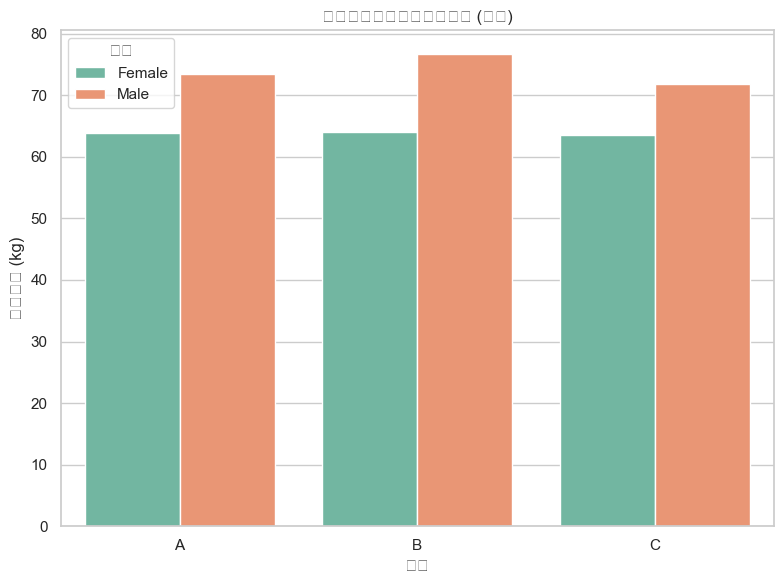

C:\Users\LEGION\AppData\Local\Temp\ipykernel_32076\1549756247.py:164: UserWarning: Glyph 22320 (\N{CJK UNIFIED IDEOGRAPH-5730}) missing from current font.
  plt.tight_layout()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_32076\1549756247.py:164: UserWarning: Glyph 21306 (\N{CJK UNIFIED IDEOGRAPH-533A}) missing from current font.
  plt.tight_layout()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_32076\1549756247.py:164: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from current font.
  plt.tight_layout()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_32076\1549756247.py:164: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from current font.
  plt.tight_layout()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_32076\1549756247.py:164: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  plt.tight_layout()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_32076\1549756247.py:164: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH

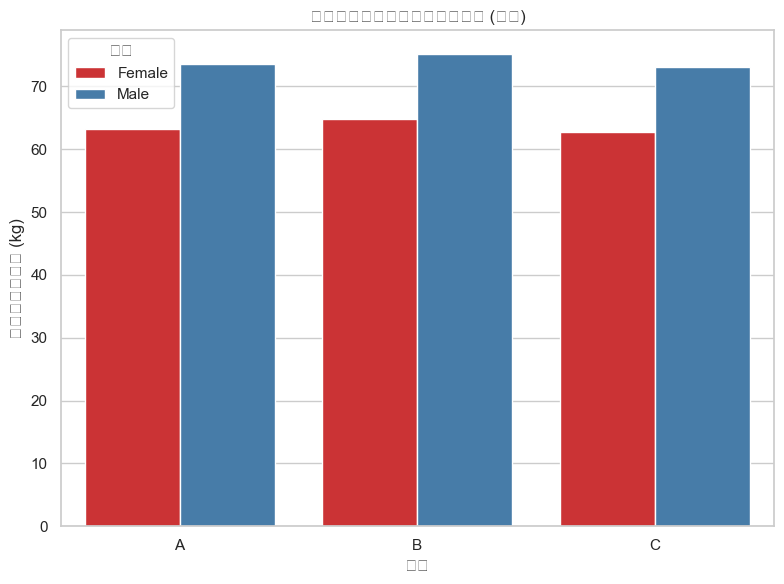

C:\Users\LEGION\AppData\Local\Temp\ipykernel_32076\1549756247.py:188: UserWarning: Glyph 22320 (\N{CJK UNIFIED IDEOGRAPH-5730}) missing from current font.
  plt.tight_layout()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_32076\1549756247.py:188: UserWarning: Glyph 21306 (\N{CJK UNIFIED IDEOGRAPH-533A}) missing from current font.
  plt.tight_layout()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_32076\1549756247.py:188: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from current font.
  plt.tight_layout()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_32076\1549756247.py:188: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from current font.
  plt.tight_layout()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_32076\1549756247.py:188: UserWarning: Glyph 21035 (\N{CJK UNIFIED IDEOGRAPH-522B}) missing from current font.
  plt.tight_layout()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_32076\1549756247.py:188: UserWarning: Glyph 20307 (\N{CJK UNIFIED IDEOGRAPH

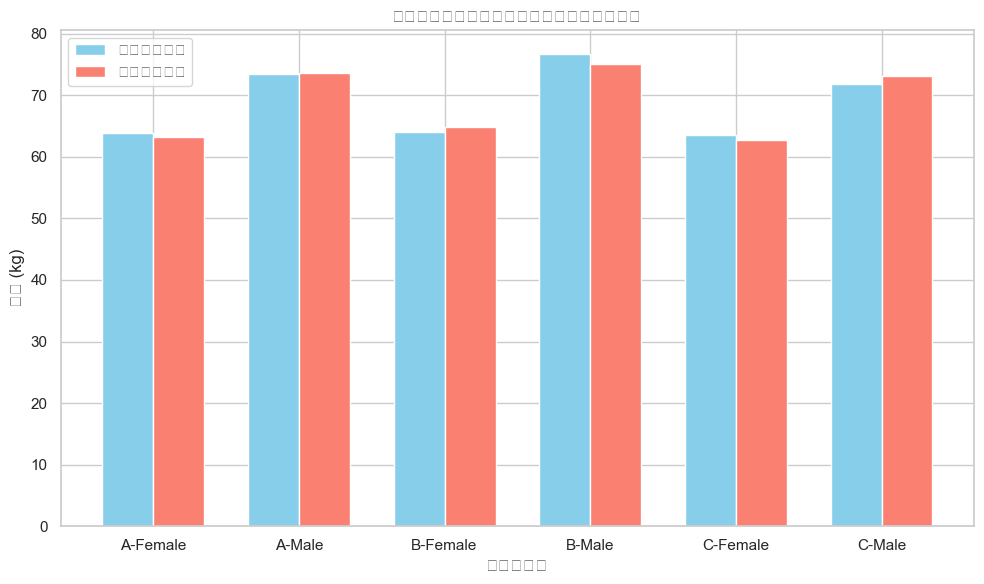

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# ------------------------------
# 1. 数据模拟
# ------------------------------
np.random.seed(42)  # 固定随机种子，便于结果复现

num_samples = 500

# 年龄：随机在 18 ~ 70 之间
ages = np.random.randint(18, 71, size=num_samples)

# 性别：0 表示女性，1 表示男性
genders = np.random.choice([0, 1], size=num_samples, p=[0.5, 0.5])

# 地区：假设有 3 个地区，分别用 A, B, C 表示(A中国 B美国 C南非)
regions = np.random.choice(['A', 'B', 'C'], size=num_samples, p=[0.75, 0.20, 0.05])

# 构造体重的“理论”期望：假设
#   1) 年龄每增加 1 岁，平均体重增加 0.5 kg
#   2) 男性在相同年龄下比女性重 10 kg
#   3) 不同地区可能有不同的基准：A: +0 kg, B: +2 kg, C: -1 kg
#   4) 随机噪声
base_weight = 50  # 假设 18 岁女性在 A 地区的基准体重
weights = (
    base_weight
    + 0.5 * (ages - 18)
    + 10.0 * genders  # 男性比女性重10 kg
    + np.where(regions == 'A', 0, 0)    # A地区基准
    + np.where(regions == 'B', 2, 0)    # B地区比A地区多2 kg
    + np.where(regions == 'C', -1, 0)   # C地区比A地区少1 kg
)

# 加入高斯噪声，使数据更贴近真实场景
noise = np.random.normal(0, 3, size=num_samples)
weights = weights + noise

# 整理成 DataFrame
df = pd.DataFrame({
    'Age': ages,
    'Gender': genders,
    'Region': regions,
    'Weight': weights
})

print("数据示例:")
print(df.head())

# ------------------------------
# 2. 特征工程：去掉年龄特征
# ------------------------------

# One-Hot编码“Region”
ohe = OneHotEncoder(sparse_output=False)
region_encoded = ohe.fit_transform(df[['Region']])
region_encoded_df = pd.DataFrame(region_encoded, columns=ohe.get_feature_names_out(['Region']))

# 拼接 Gender 和编码后的 Region 列，舍弃 Age
df_encoded = pd.concat([df[['Gender', 'Weight']], region_encoded_df], axis=1)
# 此时 df_encoded 包含 ['Gender', 'Weight', 'Region_A', 'Region_B', 'Region_C']

print("\n编码后的数据示例:")
print(df_encoded.head())

# ------------------------------
# 3. 训练集与测试集划分
# ------------------------------
X = df_encoded.drop('Weight', axis=1)
y = df_encoded['Weight']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\n训练集样本数: {X_train.shape[0]}")
print(f"测试集样本数: {X_test.shape[0]}")

# ------------------------------
# 4. 模型训练
# ------------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# ------------------------------
# 5. 模型评估
# ------------------------------
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n模型评估:")
print("测试集上的MSE: ", mse)
print("测试集上的R²: ", r2)

# 查看训练后的线性回归系数
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})
print("\n线性回归模型的各特征系数:")
print(coef_df)

# ------------------------------
# 6. 可视化
# ------------------------------

# 6.1 各地区及性别的实际平均体重
# 首先，添加性别和地区标签到 df_encoded 以便可视化
df_encoded['Gender_Label'] = df_encoded['Gender'].map({0: 'Female', 1: 'Male'})
df_encoded['Region'] = df['Region']  # 将原始的 'Region' 列加入

# 计算各地区性别的平均体重
grouped = df_encoded.groupby(['Region', 'Gender_Label'])['Weight'].mean().reset_index()

# 绘制分组柱状图
plt.figure(figsize=(8,6))
sns.barplot(x='Region', y='Weight', hue='Gender_Label', data=grouped, palette='Set2')
plt.xlabel('地区')
plt.ylabel('平均体重 (kg)')
plt.title('不同地区和性别的平均体重 (实际)')
plt.legend(title='性别')
plt.tight_layout()
plt.show()

# 6.2 模型预测的各地区及性别的平均体重

# 创建所有地区和性别的组合
prediction_combinations = pd.DataFrame({
    'Gender': [0, 1] * 3,  # Female, Male for each region
    'Region': ['A', 'A', 'B', 'B', 'C', 'C']
})

# One-Hot编码“Region”
region_pred_encoded = ohe.transform(prediction_combinations[['Region']])
region_pred_encoded_df = pd.DataFrame(region_pred_encoded, columns=ohe.get_feature_names_out(['Region']))

# 拼接 Gender 和编码后的 Region 列
prediction_data = pd.concat([prediction_combinations[['Gender']], region_pred_encoded_df], axis=1)

# 预测体重
predicted_weights = model.predict(prediction_data)

# 添加预测结果到 DataFrame
prediction_data['Predicted_Weight'] = predicted_weights
prediction_data['Gender_Label'] = prediction_data['Gender'].map({0: 'Female', 1: 'Male'})

# 添加地区标签
prediction_data['Region'] = prediction_combinations['Region']

# 绘制分组柱状图
plt.figure(figsize=(8,6))
sns.barplot(x='Region', y='Predicted_Weight', hue='Gender_Label', data=prediction_data, palette='Set1')
plt.xlabel('地区')
plt.ylabel('预测的平均体重 (kg)')
plt.title('不同地区和性别的预测平均体重 (模型)')
plt.legend(title='性别')
plt.tight_layout()
plt.show()

# 6.3 实际与预测平均体重对比

# 合并实际平均体重与预测平均体重
comparison_df = grouped.merge(
    prediction_data[['Region', 'Gender_Label', 'Predicted_Weight']],
    on=['Region', 'Gender_Label']
)

# 设置位置
x = np.arange(len(comparison_df))
width = 0.35  # 柱子的宽度

plt.figure(figsize=(10,6))
plt.bar(x - width/2, comparison_df['Weight'], width, label='实际平均体重', color='skyblue')
plt.bar(x + width/2, comparison_df['Predicted_Weight'], width, label='预测平均体重', color='salmon')

plt.xlabel('地区与性别')
plt.ylabel('体重 (kg)')
plt.title('实际与预测的不同地区和性别的平均体重对比')
plt.xticks(x, comparison_df.apply(lambda row: f"{row['Region']}-{row['Gender_Label']}", axis=1))
plt.legend()
plt.tight_layout()
plt.show()


数据示例:
   Gender Region     Weight
0       0      A  74.207891
1       0      A  76.093732
2       0      A  62.045746
3       0      A  55.548342
4       1      B  97.038958

编码后的数据示例:
   Gender     Weight  Region_A  Region_B  Region_C
0       0  74.207891       1.0       0.0       0.0
1       0  76.093732       1.0       0.0       0.0
2       0  62.045746       1.0       0.0       0.0
3       0  55.548342       1.0       0.0       0.0
4       1  97.038958       0.0       1.0       0.0

训练集样本数: 400
测试集样本数: 100

模型评估:
测试集上的MSE:  72.43168385909522
测试集上的R²:  0.5169076707166637

线性回归模型的各特征系数:
    Feature  Coefficient
0    Gender    10.356789
1  Region_A   -10.339531
2  Region_B     6.212381
3  Region_C     4.127150


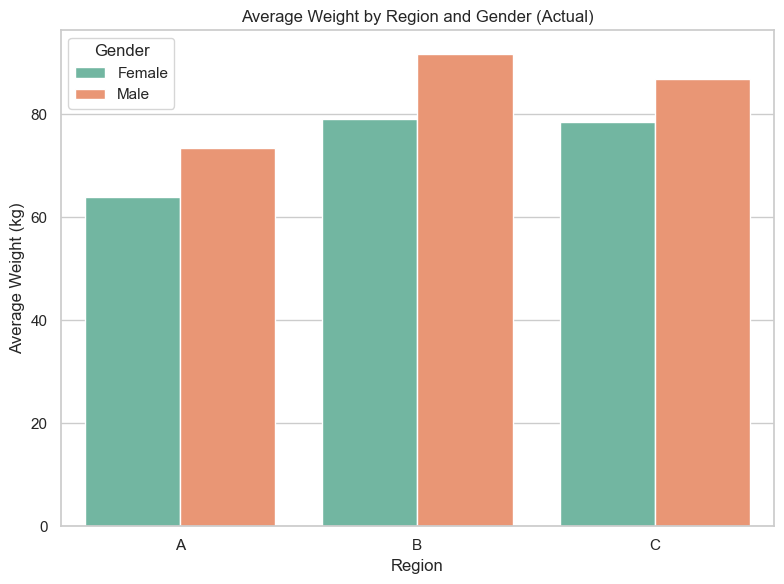

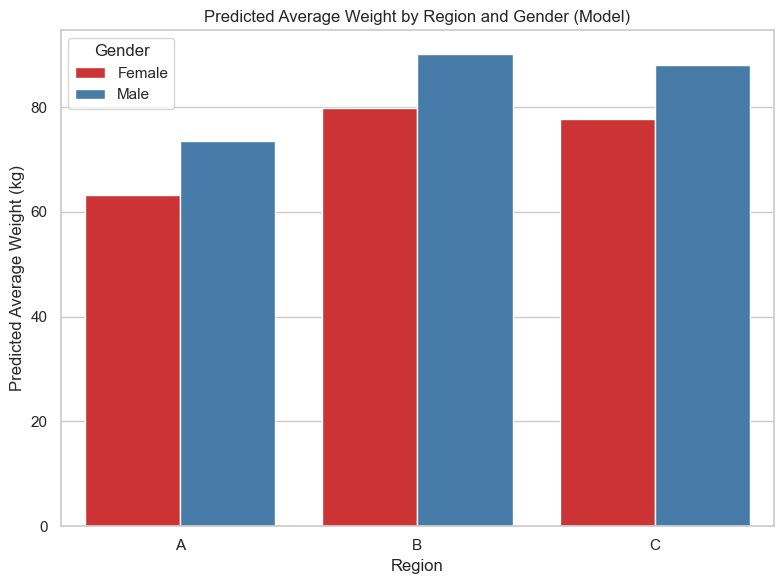

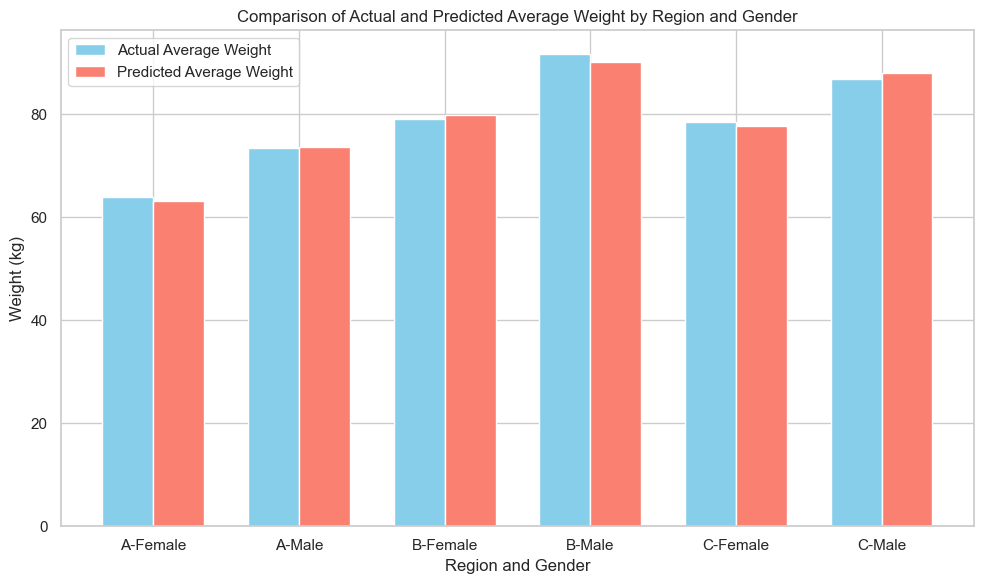

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# ------------------------------
# 1. 数据模拟 (Data Simulation)
# ------------------------------
np.random.seed(42)  # 固定随机种子，便于结果复现

num_samples = 500

# 年龄：随机在 18 ~ 70 之间
ages = np.random.randint(18, 71, size=num_samples)

# 性别：0 表示女性，1 表示男性
genders = np.random.choice([0, 1], size=num_samples, p=[0.5, 0.5])

# 地区：假设有 3 个地区，分别用 A, B, C 表示(A中国 B美国 C南非)
regions = np.random.choice(['A', 'B', 'C'], size=num_samples, p=[0.75, 0.20, 0.05])

# 构造体重的“理论”期望：假设
#   2) 男性在相同年龄下比女性重 10 kg
#   3) 不同地区可能有不同的基准：A: +0 kg, B: +2 kg, C: -1 kg
#   4) 随机噪声
base_weight = 50  # 假设 18 岁女性在 A 地区的基准体重
weights = (
    base_weight
    + 0.5 * (ages - 18)
    + 10.0 * genders  # 男性比女性重10 kg
    + np.where(regions == 'A', 0, 0)    # A地区基准
    + np.where(regions == 'B', 17, 0)    # B地区比A地区多17 kg
    + np.where(regions == 'C', 14, 0)   # C地区比A地区多14 kg
)

# 加入高斯噪声，使数据更贴近真实场景
noise = np.random.normal(0, 3, size=num_samples)
weights = weights + noise

# 整理成 DataFrame
df = pd.DataFrame({
    'Gender': genders,
    'Region': regions,
    'Weight': weights
})

print("数据示例:")
print(df.head())

# ------------------------------
# 2. 特征工程：去掉年龄特征 (Feature Engineering: Remove Age Feature)
# ------------------------------

# One-Hot编码“Region”
ohe = OneHotEncoder(sparse_output=False)
region_encoded = ohe.fit_transform(df[['Region']])
region_encoded_df = pd.DataFrame(region_encoded, columns=ohe.get_feature_names_out(['Region']))

# 拼接 Gender 和编码后的 Region 列，舍弃 Age
df_encoded = pd.concat([df[['Gender', 'Weight']], region_encoded_df], axis=1)
# 此时 df_encoded 包含 ['Gender', 'Weight', 'Region_A', 'Region_B', 'Region_C']

print("\n编码后的数据示例:")
print(df_encoded.head())

# ------------------------------
# 3. 训练集与测试集划分 (Train-Test Split)
# ------------------------------
X = df_encoded.drop('Weight', axis=1)
y = df_encoded['Weight']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\n训练集样本数: {X_train.shape[0]}")
print(f"测试集样本数: {X_test.shape[0]}")

# ------------------------------
# 4. 模型训练 (Model Training)
# ------------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# ------------------------------
# 5. 模型评估 (Model Evaluation)
# ------------------------------
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n模型评估:")
print("测试集上的MSE: ", mse)
print("测试集上的R²: ", r2)

# 查看训练后的线性回归系数
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})
print("\n线性回归模型的各特征系数:")
print(coef_df)

# ------------------------------
# 6. 可视化 (Visualization)
# ------------------------------

# 6.1 各地区及性别的实际平均体重 (6.1 Actual Average Weight by Region and Gender)
# 首先，添加性别和地区标签到 df_encoded 以便可视化
df_encoded['Gender_Label'] = df_encoded['Gender'].map({0: 'Female', 1: 'Male'})
df_encoded['Region'] = df['Region']  # 将原始的 'Region' 列加入

# 计算各地区性别的平均体重
grouped = df_encoded.groupby(['Region', 'Gender_Label'])['Weight'].mean().reset_index()

# 绘制分组柱状图
plt.figure(figsize=(8,6))
sns.barplot(x='Region', y='Weight', hue='Gender_Label', data=grouped, palette='Set2')
plt.xlabel('Region')
plt.ylabel('Average Weight (kg)')
plt.title('Average Weight by Region and Gender (Actual)')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# 6.2 模型预测的各地区及性别的平均体重 (6.2 Predicted Average Weight by Region and Gender)

# 创建所有地区和性别的组合
prediction_combinations = pd.DataFrame({
    'Gender': [0, 1] * 3,  # Female, Male for each region
    'Region': ['A', 'A', 'B', 'B', 'C', 'C']
})

# One-Hot编码“Region”
region_pred_encoded = ohe.transform(prediction_combinations[['Region']])
region_pred_encoded_df = pd.DataFrame(region_pred_encoded, columns=ohe.get_feature_names_out(['Region']))

# 拼接 Gender 和编码后的 Region 列
prediction_data = pd.concat([prediction_combinations[['Gender']], region_pred_encoded_df], axis=1)

# 预测体重
predicted_weights = model.predict(prediction_data)

# 添加预测结果到 DataFrame
prediction_data['Predicted_Weight'] = predicted_weights
prediction_data['Gender_Label'] = prediction_data['Gender'].map({0: 'Female', 1: 'Male'})

# 添加地区标签
prediction_data['Region'] = prediction_combinations['Region']

# 绘制分组柱状图
plt.figure(figsize=(8,6))
sns.barplot(x='Region', y='Predicted_Weight', hue='Gender_Label', data=prediction_data, palette='Set1')
plt.xlabel('Region')
plt.ylabel('Predicted Average Weight (kg)')
plt.title('Predicted Average Weight by Region and Gender (Model)')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# 6.3 实际与预测平均体重对比 (6.3 Comparison of Actual and Predicted Average Weight)

# 合并实际平均体重与预测平均体重
comparison_df = grouped.merge(
    prediction_data[['Region', 'Gender_Label', 'Predicted_Weight']],
    on=['Region', 'Gender_Label']
)

# 设置位置
x = np.arange(len(comparison_df))
width = 0.35  # 柱子的宽度

plt.figure(figsize=(10,6))
plt.bar(x - width/2, comparison_df['Weight'], width, label='Actual Average Weight', color='skyblue')
plt.bar(x + width/2, comparison_df['Predicted_Weight'], width, label='Predicted Average Weight', color='salmon')

plt.xlabel('Region and Gender')
plt.ylabel('Weight (kg)')
plt.title('Comparison of Actual and Predicted Average Weight by Region and Gender')
plt.xticks(x, comparison_df.apply(lambda row: f"{row['Region']}-{row['Gender_Label']}", axis=1))
plt.legend()
plt.tight_layout()
plt.show()


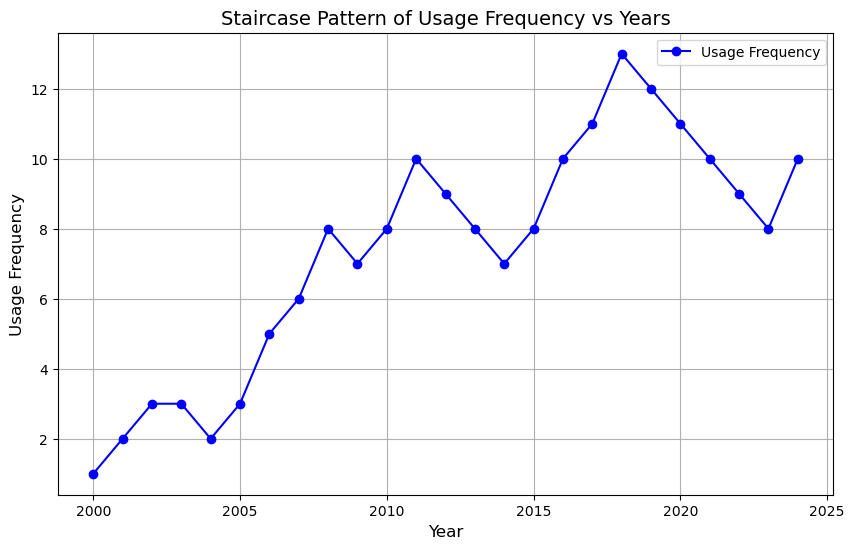

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 假设的年份数据
years = np.arange(2000, 2025)

# 随机生成的使用频率（模仿楼梯样式）
usage_frequency = [1, 2, 3, 3, 2, 3, 5, 6, 8, 7, 8, 10, 9, 8, 7, 8, 10, 11, 13, 12, 11, 10, 9, 8, 10]

# 创建折线图
plt.figure(figsize=(10, 6))
plt.plot(years, usage_frequency, marker='o', color='b', linestyle='-', markersize=6, label='Usage Frequency')

# 设置标题和标签
plt.title('Staircase Pattern of Usage Frequency vs Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Usage Frequency', fontsize=12)
plt.grid(True)

# 展示图例
plt.legend()

# 显示图形
plt.show()



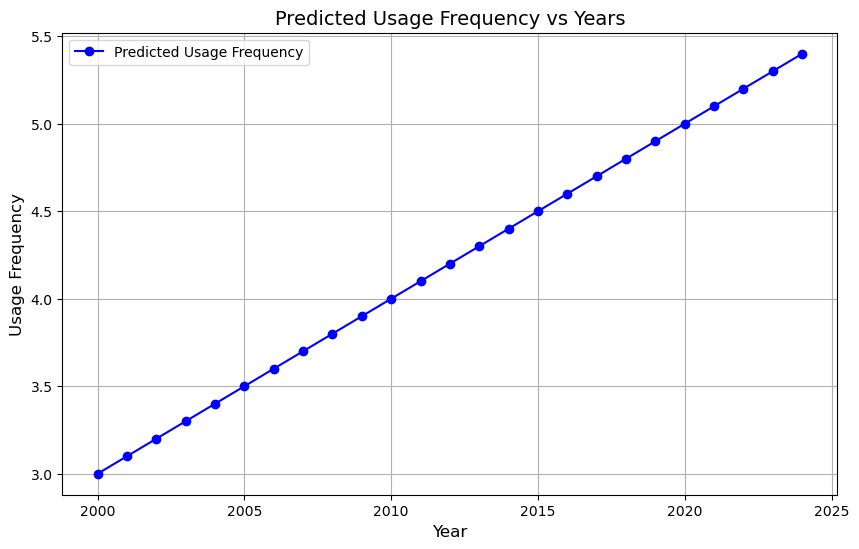

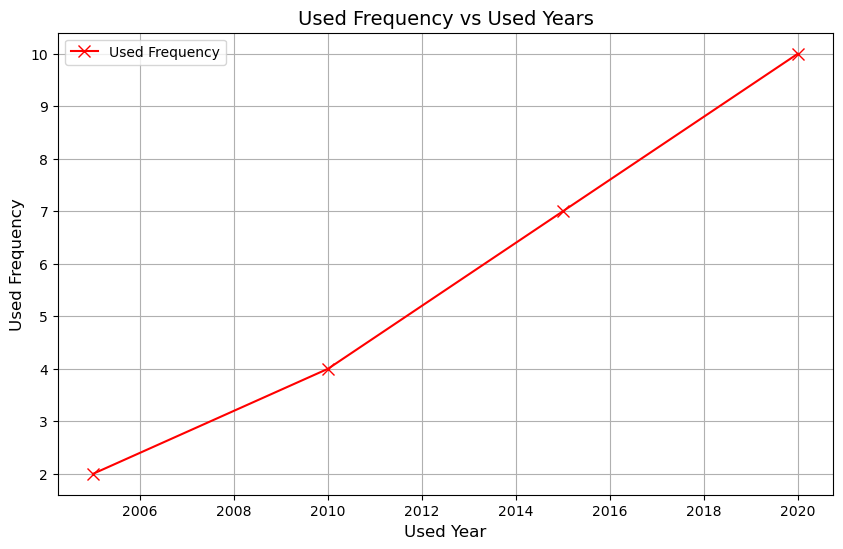

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 假设的参数
A_eff = 1.0  # 有效区域面积
k = 1.2  # 常数k
d = 5.0  # 假设的厚度d
h = 2.0  # 假设的高度h
T = 1.0  # 假设的T值
N_d = 1.0  # 假设的N_d值
D = 1.0  # 假设的D(x, y)值
G = 1.0  # 假设的G值

# 计算 km
km = k * (d / h)

# 假设的年份数据
years = np.arange(2000, 2025)

# 模拟的使用频率（根据模型预测）
usage_frequency = []
for year in years:
    # 使用模型公式预测使用频率（模拟数据）
    d_avg = (1 / A_eff) * (T * N_d * D * G * km)  # 使用模型公式
    usage_frequency.append(d_avg + (year - 2000) * 0.1)  # 加入年份对频率的影响（简单线性增长）

# 绘制第一张图：使用频率与年份关系
plt.figure(figsize=(10, 6))
plt.plot(years, usage_frequency, marker='o', color='b', linestyle='-', markersize=6, label='Predicted Usage Frequency')

# 设置标题和标签
plt.title('Predicted Usage Frequency vs Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Usage Frequency', fontsize=12)
plt.grid(True)
plt.legend()

# 显示图形
plt.show()

# 假设模型中的“已使用年份”数据
used_years = np.array([2005, 2010, 2015, 2020])  # 模拟已经使用的年份
used_frequency = np.array([2, 4, 7, 10])  # 模拟这些年份对应的使用频率

# 绘制第二张图：已使用年份的使用频率
plt.figure(figsize=(10, 6))
plt.plot(used_years, used_frequency, marker='x', color='r', linestyle='-', markersize=8, label='Used Frequency')

# 设置标题和标签
plt.title('Used Frequency vs Used Years', fontsize=14)
plt.xlabel('Used Year', fontsize=12)
plt.ylabel('Used Frequency', fontsize=12)
plt.grid(True)
plt.legend()

# 显示图形
plt.show()


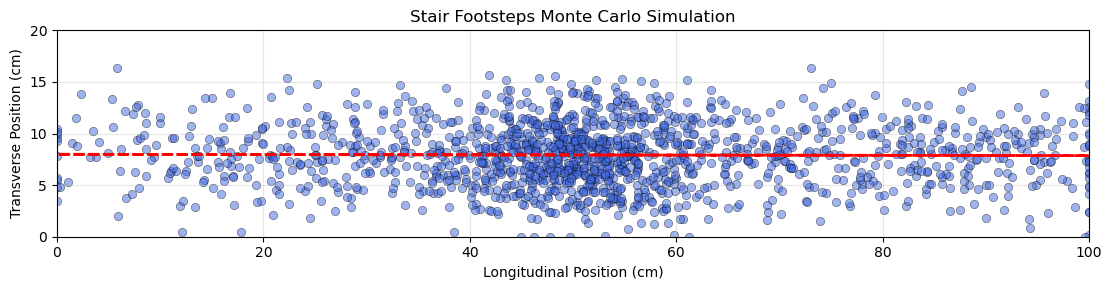

总步数: 1498
横向位置均值: 7.9 cm
纵向位置均值: 52.7 cm
横向标准差: 3.0 cm
纵向标准差: 21.5 cm


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 参数配置
STAIR_LENGTH = 100  # 阶梯纵向长度（cm）
STAIR_WIDTH = 20    # 阶梯横向宽度（cm）
SIM_STEPS = 1000    # 模拟时间步数
CENTER = 8  # 横向中心位置
CENTERY=STAIR_LENGTH / 2  # 横向中心位置
STEP_INTERVAL = 40  # 双人脚步纵向间隔（cm）

# 正态分布参数
SINGLE_STD = 3      # 单人标准差
SINGLE_STDY = 6
DOUBLE_STD = 3      # 双人中线脚步标准差

# 生成随机脚步数据
np.random.seed(42)  # 保证结果可复现
footsteps = []

for _ in range(SIM_STEPS):
    # 随机决定生成脚步数量（1或2）
    num_steps = np.random.choice([1, 2], p=[0.5, 0.5])  # 60%概率生成双人脚步
    
    if num_steps == 1:
        # 生成单人脚步
        x = np.clip(np.random.normal(CENTER, SINGLE_STD), 0, STAIR_WIDTH)
        y = np.clip(np.random.normal(CENTERY, SINGLE_STDY), 0, STAIR_LENGTH)
        footsteps.append([x, y])
    else:
        # 生成双人脚步
        base_y = np.random.uniform(0, STAIR_LENGTH)
        
        # 第一人（中线附近）
        x1 = np.clip(np.random.normal(CENTER, DOUBLE_STD), 0, STAIR_WIDTH)
        y1 = np.clip(np.random.normal(base_y, SINGLE_STDY), 0, STAIR_LENGTH)
        footsteps.append([x1, y1])
        
        # 第二人（间隔40cm）
        x2 = np.clip(np.random.normal(CENTER, SINGLE_STD), 0, STAIR_WIDTH)
        y2 = base_y + STEP_INTERVAL
        if y2 > STAIR_LENGTH:
            y2 = base_y - STEP_INTERVAL
        y2=np.clip(np.random.normal(y2, SINGLE_STDY), 0, STAIR_LENGTH)
        footsteps.append([x2, y2])

# 转换为numpy数组
footsteps = np.array(footsteps)

# 可视化结果
plt.figure(figsize=(15, 3))  # 增加画布宽度，缩小高度
plt.scatter(footsteps[:, 1], footsteps[:, 0], alpha=0.5, 
           c='royalblue', edgecolor='k', linewidth=0.5)
plt.title('Stair Footsteps Monte Carlo Simulation')
plt.xlabel('Longitudinal Position (cm)')
plt.ylabel('Transverse Position (cm)')
plt.xlim(0, STAIR_LENGTH)
plt.ylim(0, STAIR_WIDTH)
plt.grid(True, alpha=0.3)
plt.gca().set_aspect(STAIR_LENGTH/STAIR_WIDTH)

# 绘制趋势线
z = np.polyfit(footsteps[:, 1], footsteps[:, 0], 1)
p = np.poly1d(z)
plt.plot(footsteps[:, 1], p(footsteps[:, 1]), "r--", lw=2)

plt.tight_layout()
ax=plt.gca()
ax.set_aspect(1, adjustable='box')
plt.show()

# 统计信息输出
print(f"总步数: {len(footsteps)}")
print(f"横向位置均值: {np.mean(footsteps[:, 0]):.1f} cm")
print(f"纵向位置均值: {np.mean(footsteps[:, 1]):.1f} cm")
print(f"横向标准差: {np.std(footsteps[:, 0]):.1f} cm")
print(f"纵向标准差: {np.std(footsteps[:, 1]):.1f} cm")

拟合方程：y = 7.619e+00 * log(29.49482*x) + -27.325
R² = 0.9999


C:\Users\LEGION\AppData\Local\Temp\ipykernel_34912\3681949428.py:11: RuntimeWarning: invalid value encountered in log
  return c*np.log(a * x+b)


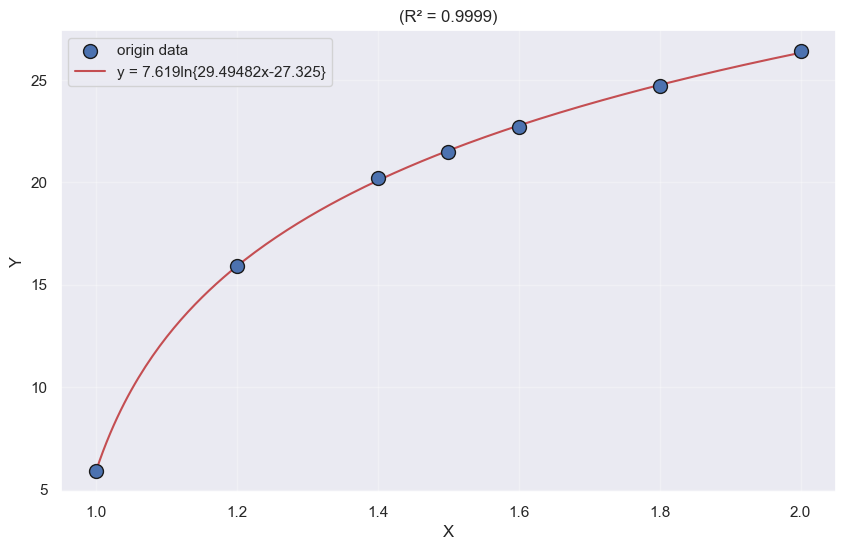

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 输入数据（x为右边值，y为左边值）
x = np.array([2, 1.8, 1.6, 1.5,1.4, 1.2, 1])
y = np.array([26.4, 24.7, 22.7, 21.5,20.2, 15.9, 5.9])

# 定义指数函数模型：y = a * exp(b*x) + c
def exp_func(x, a, b, c):
    return c*np.log(a * x+b)

# 进行曲线拟合
p0 = [1, 1, 1]  # 初始参数猜测
params, covariance = curve_fit(exp_func, x, y, p0=p0, maxfev=100000)

# 提取拟合参数
a, b, c = params
print(f"拟合方程：y = {c:.3e} * log({a:.5f}*x) + {b:.3f}")

# 计算R平方值
residuals = y - exp_func(x, *params)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
print(f"R² = {r_squared:.4f}")

# 生成拟合曲线
x_fit = np.linspace(1, 2, 200)
y_fit = exp_func(x_fit, *params)

# 可视化结果
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=100, label='origin data', zorder=3, edgecolor='k')
plt.plot(x_fit, y_fit, 'r-', label=f'y = {c:.3f}ln{{{a:.5f}x{b:.3f}}}')
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title('(R² = {:.4f})'.format(r_squared))
plt.grid(alpha=0.3)
plt.legend()
plt.show()

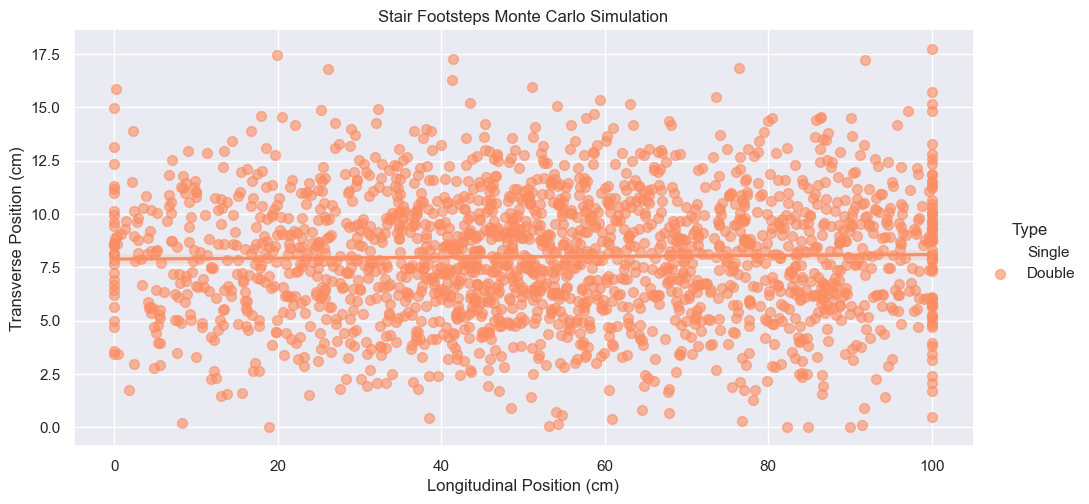

总步数: 2000
横向位置均值: 8.0 cm
纵向位置均值: 53.4 cm
横向标准差: 2.9 cm
纵向标准差: 26.4 cm


In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 参数配置
STAIR_LENGTH = 100  # 阶梯纵向长度（cm）
STAIR_WIDTH = 20    # 阶梯横向宽度（cm）
SIM_STEPS = 1000    # 模拟时间步数
CENTER = 8  # 横向中心位置
CENTERY = STAIR_LENGTH / 2  # 横向中心位置
STEP_INTERVAL = 40  # 双人脚步纵向间隔（cm）

# 正态分布参数
SINGLE_STD = 3      # 单人标准差
SINGLE_STDY = 6
DOUBLE_STD = 3      # 双人中线脚步标准差

# 生成随机脚步数据
np.random.seed(42)  # 保证结果可复现
footsteps = []

for _ in range(SIM_STEPS):
    # 随机决定生成脚步数量（1或2）
    num_steps = np.random.choice([1, 2], p=[0, 1])  # 50%概率生成双人脚步
    
    if num_steps == 1:
        # 生成单人脚步
        x = np.clip(np.random.normal(CENTER, SINGLE_STD), 0, STAIR_WIDTH)
        y = np.clip(np.random.normal(CENTERY, SINGLE_STDY), 0, STAIR_LENGTH)
        footsteps.append([x, y, 'Single'])#
    else:
        # 生成双人脚步
        base_y = np.random.uniform(0, STAIR_LENGTH)
        
        # 第一人（中线附近）
        x1 = np.clip(np.random.normal(CENTER, DOUBLE_STD), 0, STAIR_WIDTH)
        y1 = np.clip(np.random.normal(base_y, SINGLE_STDY), 0, STAIR_LENGTH)
        footsteps.append([x1, y1, 'Double'])#
        
        # 第二人（间隔40cm）
        x2 = np.clip(np.random.normal(CENTER, SINGLE_STD), 0, STAIR_WIDTH)
        y2 = base_y + STEP_INTERVAL
        if y2 > STAIR_LENGTH:
            y2 = base_y - STEP_INTERVAL
        y2 = np.clip(np.random.normal(y2, SINGLE_STDY), 0, STAIR_LENGTH)
        footsteps.append([x2, y2, 'Double'])#

# 转换为numpy数组并转换为DataFrame
footsteps = np.array(footsteps)
footsteps_df = pd.DataFrame(footsteps, columns=['Transverse Position (cm)', 'Longitudinal Position (cm)', 'Type'])

# 确保数值列的类型为float
footsteps_df['Transverse Position (cm)'] = footsteps_df['Transverse Position (cm)'].astype(float)
footsteps_df['Longitudinal Position (cm)'] = footsteps_df['Longitudinal Position (cm)'].astype(float)

# 使用Seaborn绘图
sns.set_theme()

# 绘制散点图并添加趋势线
g = sns.lmplot(
    data=footsteps_df,
    x="Longitudinal Position (cm)", y="Transverse Position (cm)", hue="Type",hue_order=[ "Single","Double"],
    height=5, aspect=2,
    markers=["x","o"], palette="Set2", scatter_kws={"s": 50, "alpha": 0.6}
)

# 设置坐标轴标签
g.set_axis_labels("Longitudinal Position (cm)", "Transverse Position (cm)")

# 设置标题
plt.title('Stair Footsteps Monte Carlo Simulation')

# 展示图形
plt.show()

# 统计信息输出
print(f"总步数: {len(footsteps_df)}")
print(f"横向位置均值: {footsteps_df['Transverse Position (cm)'].mean():.1f} cm")
print(f"纵向位置均值: {footsteps_df['Longitudinal Position (cm)'].mean():.1f} cm")
print(f"横向标准差: {footsteps_df['Transverse Position (cm)'].std():.1f} cm")
print(f"纵向标准差: {footsteps_df['Longitudinal Position (cm)'].std():.1f} cm")



拟合方程：y = 7.619e+00 * log(29.49482*x + -27.325)
R² = 0.9999


C:\Users\LEGION\AppData\Local\Temp\ipykernel_34912\3970945417.py:12: RuntimeWarning: invalid value encountered in log
  return c * np.log(a * x + b)


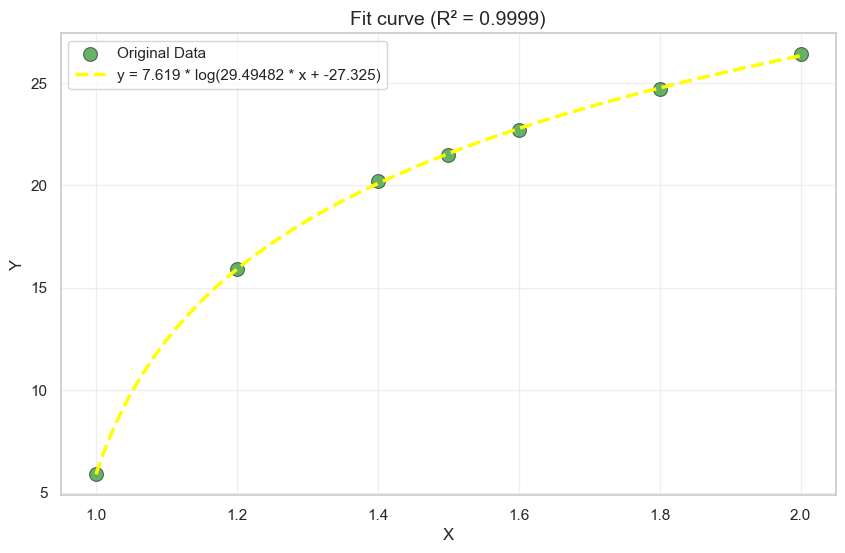

In [82]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 输入数据（x为右边值，y为左边值）
x = np.array([2, 1.8, 1.6, 1.5, 1.4, 1.2, 1])
y = np.array([26.4, 24.7, 22.7, 21.5, 20.2, 15.9, 5.9])

# 定义指数函数模型：y = c * log(a * x + b)
def exp_func(x, a, b, c):
    return c * np.log(a * x + b)

# 进行曲线拟合
p0 = [1, 1, 1]  # 初始参数猜测
params, covariance = curve_fit(exp_func, x, y, p0=p0, maxfev=100000)

# 提取拟合参数
a, b, c = params
print(f"拟合方程：y = {c:.3e} * log({a:.5f}*x + {b:.3f})")

# 计算R平方值
residuals = y - exp_func(x, *params)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
print(f"R² = {r_squared:.4f}")

# 生成拟合曲线
x_fit = np.linspace(1, 2, 200)
y_fit = exp_func(x_fit, *params)

# 设置Seaborn主题
sns.set_theme(style="whitegrid")

# 可视化结果
plt.figure(figsize=(10, 6))

# 使用Seaborn绘制散点图
sns.scatterplot(x=x, y=y, s=100, color='green', label='Original Data', edgecolor='k',alpha=0.6)

# 绘制拟合曲线
plt.plot(x_fit, y_fit, '--', label=f'y = {c:.3f} * log({a:.5f} * x + {b:.3f})',color='yellow',linewidth=2.5)

# 设置标签和标题
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title(f'Fit curve (R² = {r_squared:.4f})', fontsize=14)

# 添加网格、图例
plt.grid(True, alpha=0.3)
plt.legend()

# 显示图形
plt.show()


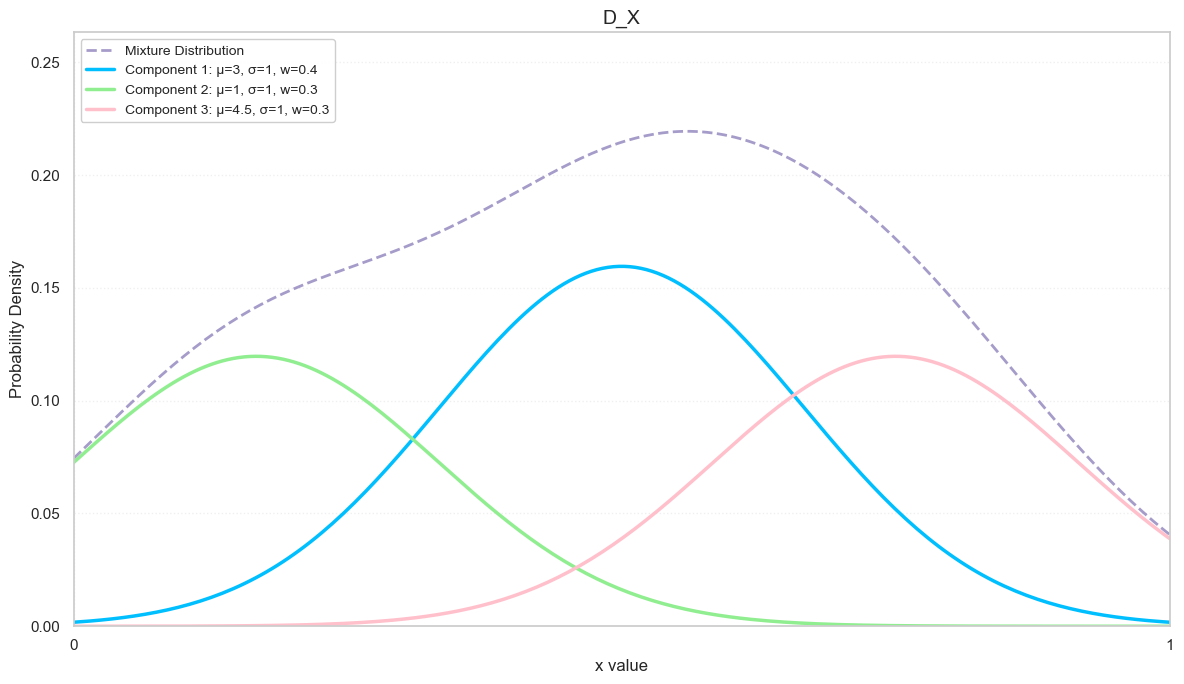

In [86]:

import numpy as np
import matplotlib.pyplot as plt

# 参考图里的数据
components = [
    {"weight": 0.4, "mu": 3, "sigma": 1},  # 第一个高斯分量
    {"weight": 0.3, "mu": 1, "sigma": 1},  # 第二个高斯分量
    {"weight": 0.3, "mu": 4.5, "sigma": 1}   #第三个高斯分量
]


y_curve = np.linspace(0, 6, 200)

total_curve = np.zeros_like(y_curve)
component_curves = []
num=0

for comp in components:
    if(comp["weight"]==0):
        continue
    num+=1
    coeff = comp["weight"] / (np.sqrt(2*np.pi)*comp["sigma"])
    exponent = -0.5*((y_curve - comp["mu"])/comp["sigma"])**2
    density = coeff * np.exp(exponent)
    
    component_curves.append(density)
    total_curve += density

plt.figure(figsize=(12, 7))
plt.title("D_X", fontsize=14)   #这里换图的标题
plt.xlabel("x value", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)

plt.plot(y_curve, total_curve, 'm--', lw=2, alpha=0.7, 
        label='Mixture Distribution')

colors = ['deepskyblue', 'lightgreen', 'pink'] 
labels = [
    f'Component {i+1}: μ={c["mu"]}, σ={c["sigma"]}, w={c["weight"]}'
    for i, c in enumerate(components)
]


for i in range(num):
    plt.plot(y_curve, component_curves[i], 
             color=colors[i], lw=2.5,
             linestyle='-', 
             label=labels[i])

plt.legend(fontsize=10, loc='upper left', framealpha=0.95)
plt.grid(alpha=0.3, linestyle=':')
plt.xlim(0, 6)
plt.ylim(0, max(total_curve)*1.2)
plt.xticks([min(y_curve), max(y_curve)], [0, 1])    #这里在画D_X的时候写【0，1】画D_Y的时候写【0，0.2】
plt.tight_layout()
plt.show()

{
    "xAxis": [
        0.0,
        0.03015075376884422,
        0.06030150753768844,
        0.09045226130653267,
        0.12060301507537688,
        0.1507537688442211,
        0.18090452261306533,
        0.21105527638190955,
        0.24120603015075376,
        0.271356783919598,
        0.3015075376884422,
        0.3316582914572864,
        0.36180904522613067,
        0.39195979899497485,
        0.4221105527638191,
        0.4522613065326633,
        0.4824120603015075,
        0.5125628140703518,
        0.542713567839196,
        0.5728643216080401,
        0.6030150753768844,
        0.6331658291457286,
        0.6633165829145728,
        0.6934673366834171,
        0.7236180904522613,
        0.7537688442211055,
        0.7839195979899497,
        0.8140703517587939,
        0.8442211055276382,
        0.8743718592964824,
        0.9045226130653266,
        0.9346733668341708,
        0.964824120603015,
        0.9949748743718593,
        1.0251256281407035,
        1.05

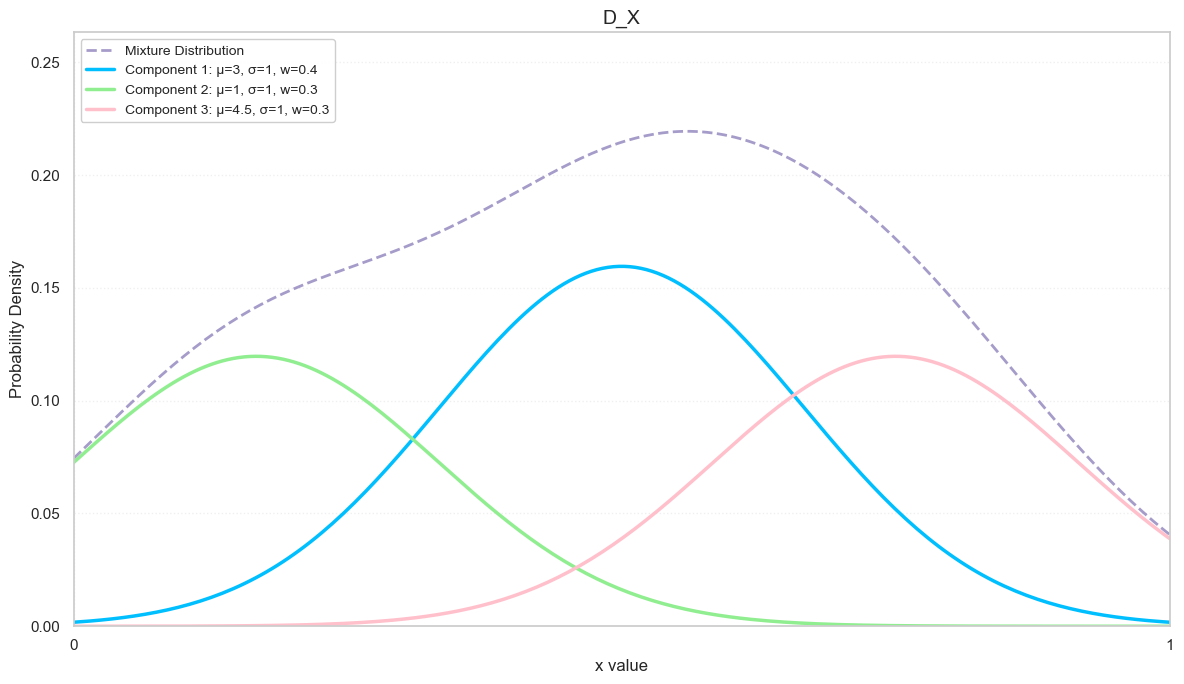

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置seaborn风格
sns.set(style="whitegrid")

# 参考图里的数据
components = [
    {"weight": 0.4, "mu": 3, "sigma": 1},  # 第一个高斯分量
    {"weight": 0.3, "mu": 1, "sigma": 1},  # 第二个高斯分量
    {"weight": 0.3, "mu": 4.5, "sigma": 1}   #第三个高斯分量
]

y_curve = np.linspace(0, 6, 200)

total_curve = np.zeros_like(y_curve)
component_curves = []
num = 0

for comp in components:
    if(comp["weight"] == 0):
        continue
    num += 1
    coeff = comp["weight"] / (np.sqrt(2 * np.pi) * comp["sigma"])
    exponent = -0.5 * ((y_curve - comp["mu"]) / comp["sigma"]) ** 2
    density = coeff * np.exp(exponent)
    
    component_curves.append(density)
    total_curve += density

plt.figure(figsize=(12, 7))
plt.title("D_X", fontsize=14)  # 这里换图的标题
plt.xlabel("x value", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)

# 绘制总的混合分布
plt.plot(y_curve, total_curve, 'm--', lw=2, alpha=0.7, label='Mixture Distribution')

colors = ['deepskyblue', 'lightgreen', 'pink']
labels = [
    f'Component {i + 1}: μ={c["mu"]}, σ={c["sigma"]}, w={c["weight"]}'
    for i, c in enumerate(components)
]

# 绘制每个组件
for i in range(num):
    plt.plot(y_curve, component_curves[i], color=colors[i], lw=2.5, linestyle='-', label=labels[i])

plt.legend(fontsize=10, loc='upper left', framealpha=0.95)
plt.grid(alpha=0.3, linestyle=':')
plt.xlim(0, 6)
plt.ylim(0, max(total_curve) * 1.2)
plt.xticks([min(y_curve), max(y_curve)], [0, 1])  # 这里在画D_X的时候写【0，1】画D_Y的时候写【0，0.2】
plt.tight_layout()
plt.show()


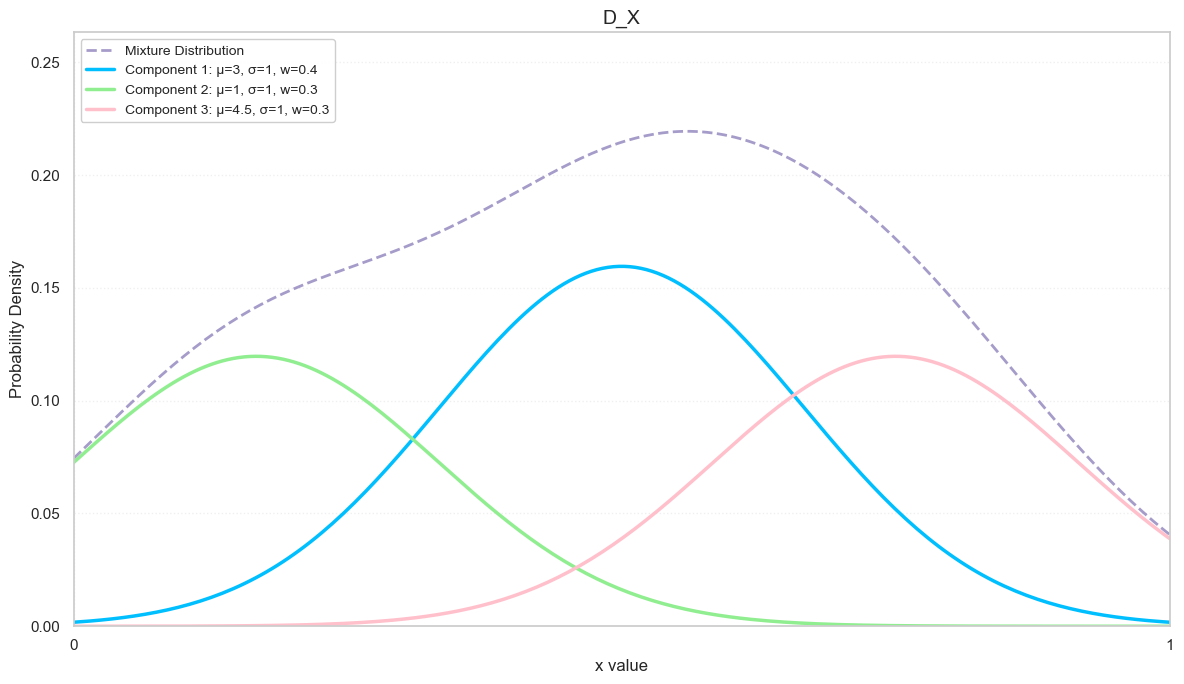

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置seaborn风格
sns.set(style="whitegrid")

# 参考图里的数据
components = [
    {"weight": 0.4, "mu": 3, "sigma": 1},  # 第一个高斯分量
    {"weight": 0.3, "mu": 1, "sigma": 1},  # 第二个高斯分量
    {"weight": 0.3, "mu": 4.5, "sigma": 1}   #第三个高斯分量
]

y_curve = np.linspace(0, 6, 200)

total_curve = np.zeros_like(y_curve)
component_curves = []
num = 0

for comp in components:
    if(comp["weight"] == 0):
        continue
    num += 1
    coeff = comp["weight"] / (np.sqrt(2 * np.pi) * comp["sigma"])
    exponent = -0.5 * ((y_curve - comp["mu"]) / comp["sigma"]) ** 2
    density = coeff * np.exp(exponent)
    
    component_curves.append(density)
    total_curve += density

plt.figure(figsize=(12, 7))
plt.title("D_X", fontsize=14)  # 这里换图的标题
plt.xlabel("x value", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)

# 绘制总的混合分布
plt.plot(y_curve, total_curve, 'm--', lw=2, alpha=0.7, label='Mixture Distribution')

colors = ['deepskyblue', 'lightgreen', 'pink']
labels = [
    f'Component {i + 1}: μ={c["mu"]}, σ={c["sigma"]}, w={c["weight"]}'
    for i, c in enumerate(components)
]

# 绘制每个组件
for i in range(num):
    plt.plot(y_curve, component_curves[i], color=colors[i], lw=2.5, linestyle='-', label=labels[i])

plt.legend(fontsize=10, loc='upper left', framealpha=0.95)
plt.grid(alpha=0.3, linestyle=':')
plt.xlim(0, 6)
plt.ylim(0, max(total_curve) * 1.2)
plt.xticks([min(y_curve), max(y_curve)], [0, 1])  # 这里在画D_X的时候写【0，1】画D_Y的时候写【0，0.2】
plt.tight_layout()
plt.show()


C:\Users\LEGION\AppData\Local\Temp\ipykernel_34912\2063268918.py:39: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data, x="x", y="Total",palette="tab10", linewidth=2.5, label="Mixture Distribution")
C:\Users\LEGION\AppData\Local\Temp\ipykernel_34912\2063268918.py:48: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data, x="x", y=f"Component {i + 1}", palette="tab10", linewidth=2.5, label=labels[i],linestyle="--")
C:\Users\LEGION\AppData\Local\Temp\ipykernel_34912\2063268918.py:48: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data, x="x", y=f"Component {i + 1}", palette="tab10", linewidth=2.5, label=labels[i],linestyle="--")
C:\Users\LEGION\AppData\Local\Temp\ipykernel_34912\2063268918.py:48: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data, x="x", y=f"Component {i + 1}", palette="tab

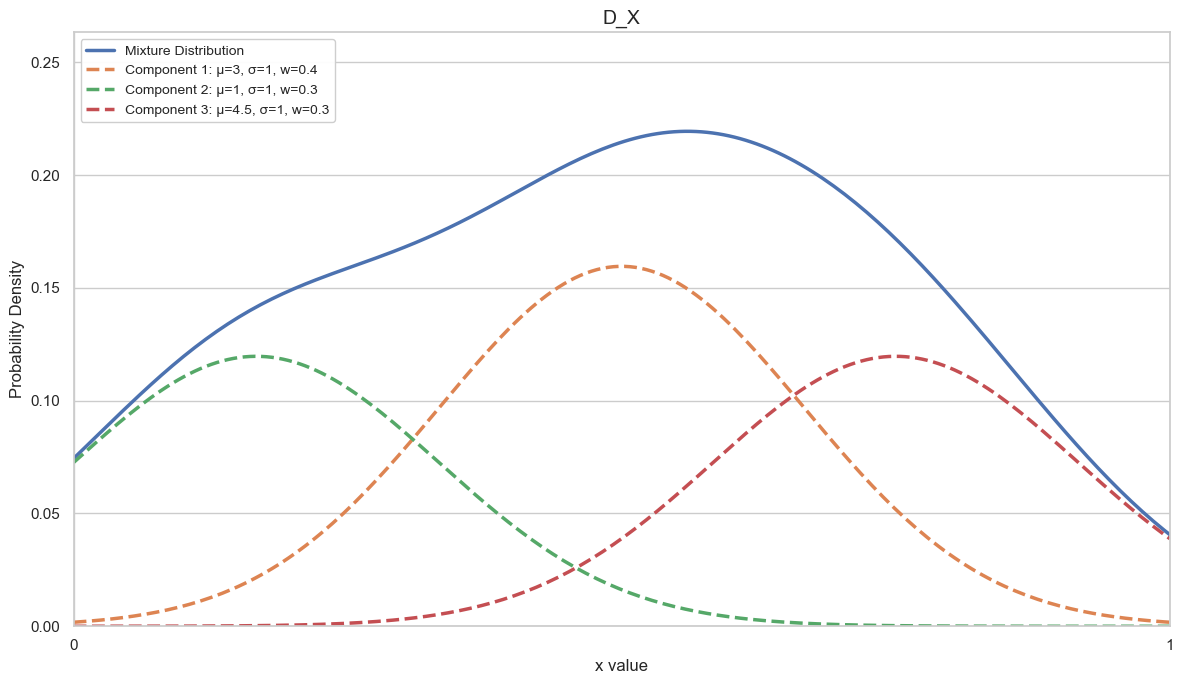

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置seaborn样式
sns.set_theme(style="whitegrid")

# 参考图里的数据
components = [
    {"weight": 0.4, "mu": 3, "sigma": 1},  # 第一个高斯分量
    {"weight": 0.3, "mu": 1, "sigma": 1},  # 第二个高斯分量
    {"weight": 0.3, "mu": 4.5, "sigma": 1}   # 第三个高斯分量
]

y_curve = np.linspace(0, 6, 200)

total_curve = np.zeros_like(y_curve)
component_curves = []
num = 0

for comp in components:
    if(comp["weight"] == 0):
        continue
    num += 1
    coeff = comp["weight"] / (np.sqrt(2 * np.pi) * comp["sigma"])
    exponent = -0.5 * ((y_curve - comp["mu"]) / comp["sigma"]) ** 2
    density = coeff * np.exp(exponent)
    
    component_curves.append(density)
    total_curve += density

# 创建数据框用于seaborn绘制
data = pd.DataFrame({"x": y_curve, "Total": total_curve})
for i in range(num):
    data[f"Component {i + 1}"] = component_curves[i]

# 使用seaborn绘制
plt.figure(figsize=(12, 7))
sns.lineplot(data=data, x="x", y="Total",palette="tab10", linewidth=2.5, label="Mixture Distribution")

colors = ['deepskyblue', 'lightgreen', 'pink']
labels = [
    f'Component {i+1}: μ={c["mu"]}, σ={c["sigma"]}, w={c["weight"]}'
    for i, c in enumerate(components)
]

for i in range(num):
    sns.lineplot(data=data, x="x", y=f"Component {i + 1}", palette="tab10", linewidth=2.5, label=labels[i],linestyle="--")

# 设置图表标题、标签和图例
plt.title("D_X", fontsize=14)
plt.xlabel("x value", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.legend(fontsize=10, loc='upper left', framealpha=0.95)
#plt.grid(alpha=0.3, linestyle=':')
plt.xlim(0, 6)
plt.ylim(0, max(total_curve) * 1.2)
plt.xticks([min(y_curve), max(y_curve)], [0, 1])
plt.tight_layout()
plt.show()


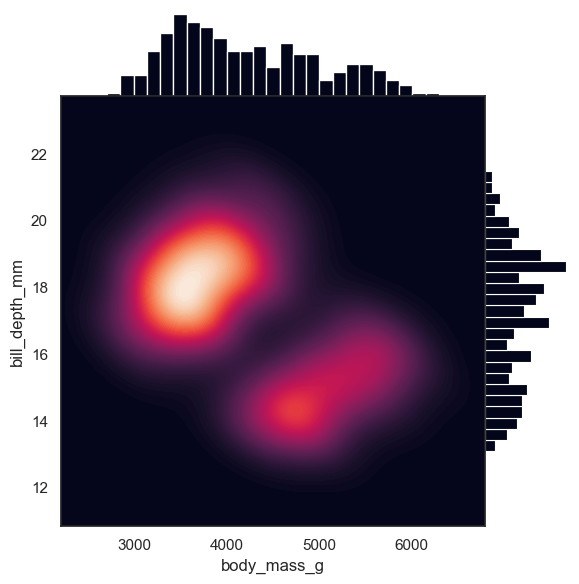

In [110]:
import seaborn as sns
sns.set_theme(style="white")

df = sns.load_dataset("penguins")

g = sns.JointGrid(data=df, x="body_mass_g", y="bill_depth_mm", space=0)
g.plot_joint(sns.kdeplot,
             fill=True, clip=((2200, 6800), (10, 25)),
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)


[[0.00905994 0.01460629 0.0164128  0.01491775 0.01298615 0.0102764
  0.00613104 0.00247091 0.00064788 0.00010935]
 [0.02256205 0.03637416 0.04087292 0.0371498  0.03233953 0.02559139
  0.01526817 0.00615334 0.00161341 0.00027231]
 [0.02440074 0.03933847 0.04420385 0.04017732 0.03497503 0.02767696
  0.01651245 0.0066548  0.0017449  0.0002945 ]
 [0.02113442 0.03407256 0.03828666 0.03479912 0.03029322 0.02397208
  0.01430207 0.00576398 0.00151132 0.00025508]
 [0.03148332 0.05075688 0.05703449 0.05183921 0.04512691 0.03571049
  0.02130537 0.00858643 0.00225137 0.00037998]
 [0.03148332 0.05075688 0.05703449 0.05183921 0.04512691 0.03571049
  0.02130537 0.00858643 0.00225137 0.00037998]
 [0.02113442 0.03407256 0.03828666 0.03479912 0.03029322 0.02397208
  0.01430207 0.00576398 0.00151132 0.00025508]
 [0.02440074 0.03933847 0.04420385 0.04017732 0.03497503 0.02767696
  0.01651245 0.0066548  0.0017449  0.0002945 ]
 [0.02256205 0.03637416 0.04087292 0.0371498  0.03233953 0.02559139
  0.01526817 

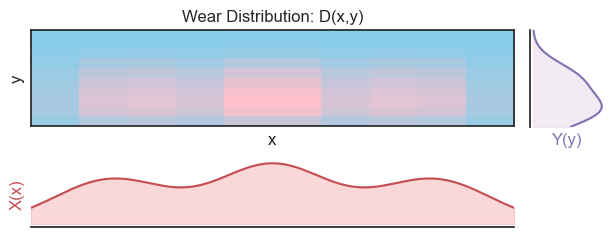

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
sns.set_theme(style="white")

T=100
N_d=260
G=700
K=1.8e-7
d=8e-4
H=175e6

# 1) 定义自定义Colormap: 从天蓝(#87CEEB)到粉色(#FFC0CB)
cmap_blue_pink = LinearSegmentedColormap.from_list(
    'blue_pink',  # colormap 名字，可自定
    ['#87CEEB', '#FFC0CB']
)
############################################
# 1.  假设我们有如下函数来给出：
#     - 2D 热力图数据 f2d
#     - 一维分布 X(x) 与 Y(y)
############################################
def X(x):
    """示例: 人为定义的 3个高斯混合, 仅供演示."""
    from math import exp, sqrt, pi
    # (此处写死, 真实场景可替换成您自己的 X(x))
    w = [0.3, 0.4, 0.3]
    mu= [1, 3.0, 5.0]
    s = [0.7, 0.7, 0.7]
    total = 0
    for i in range(3):
        total += w[i]*(1/(sqrt(2*pi)*s[i]))*exp(-0.5*((x-mu[i])/s[i])**2)
    return total

def Y(y):
    """示例: 人为定义的 2个高斯混合, 仅供演示."""
    from math import exp, sqrt, pi
    w = [0.4, 0.6]
    mu= [3.0, 1.0]
    s = [1.0, 1.0]
    total = 0
    for j in range(2):
        total += w[j]*(1/(sqrt(2*pi)*s[j]))*exp(-0.5*((y-mu[j])/s[j])**2)
    return total

def f2d_func(x, y):
    """示例: 6个二维可分离高斯的混合, 仅供演示."""
    return X(x)*Y(y)

############################################
# 2.  生成网格并计算 2D 分布 (f2d)
############################################
Nx, Ny = 10, 80
xs = np.linspace(0, 6, Nx)
ys = np.linspace(0, 6, Ny)

f2d = np.zeros((Nx, Ny))
for i, xv in enumerate(xs):
    for j, yv in enumerate(ys):
        f2d[i,j] = f2d_func(xv, yv)  # 计算二维密度

############################################
# 3.  分别计算 X(x), Y(y) 采样用于画边缘曲线
############################################
x_curve = np.linspace(0, 6, 200)
X_vals = [X(xx) for xx in x_curve]

y_curve = np.linspace(0, 6, 200)
Y_vals = [Y(yy) for yy in y_curve]

############################################
# 4.  使用 GridSpec 创建主图+子图布局
############################################
fig = plt.figure(figsize=(8,8))

# 定义一个 2行x2列的网格:
#   行高比: [4,1]  => 第一行(主图)比第二行( X 分布) 高4倍
#   列宽比: [4,1]  => 第一列(主图)比第二列( Y 分布) 宽4倍
gs = gridspec.GridSpec(
    nrows=2, ncols=2, 
    height_ratios=[8,1],
    width_ratios=[4,1],
    wspace=0.05,  # 子图间水平间隔
    hspace=0.05   # 子图间垂直间隔
)

# 主图: 放在 [0,0], 大块区域
main_ax  = fig.add_subplot(gs[0,0])

# X 的分布图: 放在 [1,0], 与主图共享 X 轴 (sharex)
xDist_ax = fig.add_subplot(gs[1,0], sharex=main_ax)

# Y 的分布图: 放在 [0,1], 与主图共享 Y 轴 (sharey)
yDist_ax = fig.add_subplot(gs[0,1], sharey=main_ax)

# 网格[1,1] 位置留空(或者可做别的)
# gs[1,1] 可不用
print(f2d)
############################################
# 5.  在 main_ax 上绘制 2D heatmap
############################################
heatmap = main_ax.imshow(f2d.T,
                         origin='lower',
                         extent=[xs[0], xs[-1], ys[0], ys[-1]],
                         aspect='auto',
                         cmap=cmap_blue_pink  # 使用自定义的蓝→粉渐变
                         )
main_ax.set_xlabel("x")
main_ax.set_ylabel("y")

# 2) 设置纵横比: aspect < 1 => Y 轴被“压缩”
main_ax.set_aspect(0.2, adjustable='box')

main_ax.set_title("Wear Distribution: D(x,y)")


############################################
# 6. 在 xDist_ax 上画 X(x) [随 x 的一维曲线]
#    注意: 它与主图共用 X 轴 => xDist_ax 的 x范围与 main_ax 相同
############################################
xDist_ax.plot(x_curve, X_vals, 'r-')
xDist_ax.fill_between(x_curve, X_vals, 0,  # 填充曲线下方区域
                     color='lightcoral',   # 使用浅红色填充
                     alpha=0.3)            # 半透明效果
xDist_ax.set_xlim(xs[0], xs[-1])  # 以防万一
xDist_ax.set_xticks([])
xDist_ax.set_yticks([])
# 我们通常只想显示 xDist_ax 上的 Y 轴, 但让它倒置, 
# 这样看起来就像是贴在主图 x 轴下方
#xDist_ax.invert_yaxis()  
xDist_ax.set_ylabel("X(x)", color='r') 
# 可能不需要再写 xDist_ax.set_xlabel, 因为主图已有 x label

# 隐藏多余的刻度(可选)
#plt.setp(xDist_ax.get_xticklabels(), visible=False)
#xDist_ax.tick_params(axis='x', which='both', length=0)
# 只保留某一条边框，其余全部隐藏
xDist_ax.spines['top'].set_visible(False)
xDist_ax.spines['right'].set_visible(False)
xDist_ax.spines['left'].set_visible(False)
pos = xDist_ax.get_position()  # 返回 [x0, y0, width, height]
# 往下移动 0.05
xDist_ax.set_position([pos.x0, pos.y0 + 0.25, pos.width, pos.height])
# 这样 xDist_ax 只剩下 bottom 这条边框可见
############################################
# 7. 在 yDist_ax 上画 Y(y) [随 y 的一维曲线]
#    此时我们希望横坐标表示 "pdf", 纵坐标与主图共用
############################################

yDist_ax.plot(Y_vals, y_curve, 'm-')
yDist_ax.fill_betweenx(y_curve, Y_vals, 0,  # 填充曲线左侧区域
                      color='thistle',      # 使用浅紫色填充
                      alpha=0.3)            # 半透明效果
yDist_ax.set_xticks([])
yDist_ax.set_yticks([])
# 共享了 main_ax 的 y范围
yDist_ax.set_ylim(ys[0], ys[-1])
#yDist_ax.invert_xaxis()  # 让分布朝左延伸
yDist_ax.set_xlabel("Y(y)", color='m')
# 同理, 隐藏多余刻度
#plt.setp(xDist_ax.get_xticklabels(), visible=False)
#yDist_ax.tick_params(axis='y', which='both', length=0)
yDist_ax.spines['top'].set_visible(False)
#yDist_ax.spines['left'].set_visible(False)
yDist_ax.spines['bottom'].set_visible(False)
yDist_ax.spines['right'].set_visible(False)

pos = yDist_ax.get_position()  # 返回一个 Bbox 对象
# 以 pos.x0, pos.y0, pos.width, pos.height 形式获取数值
x0 = pos.x0
y0 = pos.y0
w0 = pos.width
h0 = pos.height

# 计算新的宽度 new_width
new_height = h0 / 5.5  # 举例：缩小到原来的 1/5
new_weight = w0 / 1.6
# 也可以在这里加一些修正，让 x0+x1 不与主图重叠:
# x0 += (w0 - new_width)

# 最后，必须用set_position()传入一个四元list或tuple
yDist_ax.set_position([x0, y0+0.273, new_weight, new_height])
# 仅 right spine 可见
############################################
# 8. 显示
############################################
plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
sns.set_theme(style="white")

T=100
N_d=260
G=700
K=1.8e-7
d=8e-4
H=175e6

# 1) 定义自定义Colormap: 从天蓝(#87CEEB)到粉色(#FFC0CB)
cmap_blue_pink = LinearSegmentedColormap.from_list(
    'blue_pink',  # colormap 名字，可自定
    ['#87CEEB', '#FFC0CB']
)
############################################
# 1.  假设我们有如下函数来给出：
#     - 2D 热力图数据 f2d
#     - 一维分布 X(x) 与 Y(y)
############################################
def X(x):
    """示例: 人为定义的 3个高斯混合, 仅供演示."""
    from math import exp, sqrt, pi
    # (此处写死, 真实场景可替换成您自己的 X(x))
    w = [0.3, 0.4, 0.3]
    mu= [1, 3.0, 5.0]
    s = [0.7, 0.7, 0.7]
    total = 0
    for i in range(3):
        total += w[i]*(1/(sqrt(2*pi)*s[i]))*exp(-0.5*((x-mu[i])/s[i])**2)
    return total

def Y(y):
    """示例: 人为定义的 2个高斯混合, 仅供演示."""
    from math import exp, sqrt, pi
    w = [0.4, 0.6]
    mu= [3.0, 1.0]
    s = [1.0, 1.0]
    total = 0
    for j in range(2):
        total += w[j]*(1/(sqrt(2*pi)*s[j]))*exp(-0.5*((y-mu[j])/s[j])**2)
    return total

def f2d_func(x, y):
    """示例: 6个二维可分离高斯的混合, 仅供演示."""
    return X(x)*Y(y)

############################################
# 2.  生成网格并计算 2D 分布 (f2d)
############################################
Nx, Ny = 80, 80
xs = np.linspace(0, 6, Nx)
ys = np.linspace(0, 6, Ny)
s=0
f2d = np.zeros((Nx, Ny))
for i, xv in enumerate(xs):
    for j, yv in enumerate(ys):
        f2d[i,j] = f2d_func(xv, yv)  # 计算二维密度
xs1 = np.linspace(0, 6, Nx*Nx)
ys1 = np.linspace(0, 6, Ny*Ny)
data=[]
print(f2d)
for i in range(0,Nx):
    for j in range(0,Ny):
       temp={
           'x':xs[i],
           'y':ys[j],
           'f2d':f2d[i][j]}
       s=s+1
       data.append(temp)
X1=[]
Y1=[]
f2d=[]
for i in range(0,6400):
    X1.append(data[i]['x'])
    Y1.append(data[i]['y'])
    f2d.append(data[i]['f2d'])
data = {
    'x':X1,
    'y':Y1,
    'f2d':f2d
}

df = pd.DataFrame(data)
print(df)




[[0.00905994 0.00976598 0.01046983 ... 0.00017052 0.00013694 0.00010935]
 [0.01051827 0.01133795 0.0121551  ... 0.00019797 0.00015899 0.00012695]
 [0.01206903 0.01300956 0.01394718 ... 0.00022716 0.00018243 0.00014566]
 ...
 [0.01206903 0.01300956 0.01394718 ... 0.00022716 0.00018243 0.00014566]
 [0.01051827 0.01133795 0.0121551  ... 0.00019797 0.00015899 0.00012695]
 [0.00905994 0.00976598 0.01046983 ... 0.00017052 0.00013694 0.00010935]]
6400
{'x': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0759493670886076, 0.0759493670886076, 0.0759493670886076, 0.0759493670886076, 0.0759493670886076, 0.0759493670886076, 0.0759493670886076, 0.07

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2     

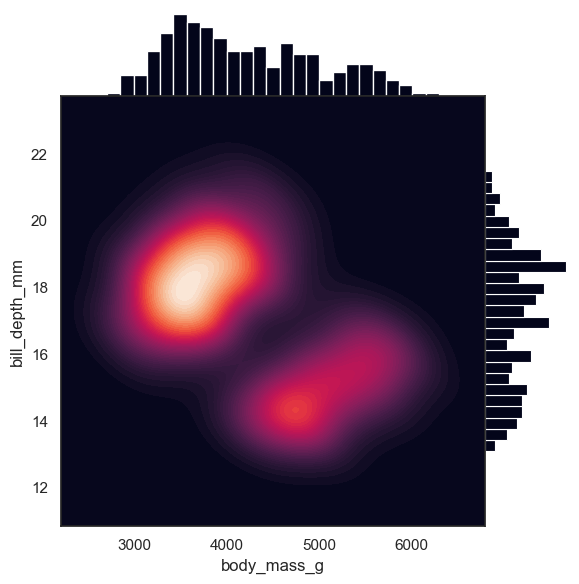

In [142]:
import seaborn as sns
sns.set_theme(style="white")

df = sns.load_dataset("penguins")
print(df)
g = sns.JointGrid(data=df, x="body_mass_g", y="bill_depth_mm", space=0)
g.plot_joint(sns.kdeplot,
             fill=True, clip=((2200, 6800), (10, 25)),
             thresh=0, levels=50, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)

     x         y       f2d
0  0.0  0.000000  0.009019
1  0.0  0.153846  0.010433
2  0.0  0.307692  0.011805
3  0.0  0.461538  0.013072
4  0.0  0.615385  0.014177


ValueError: Could not interpret value `f2d` for `weights`. Value is a string, but `data` was not passed.

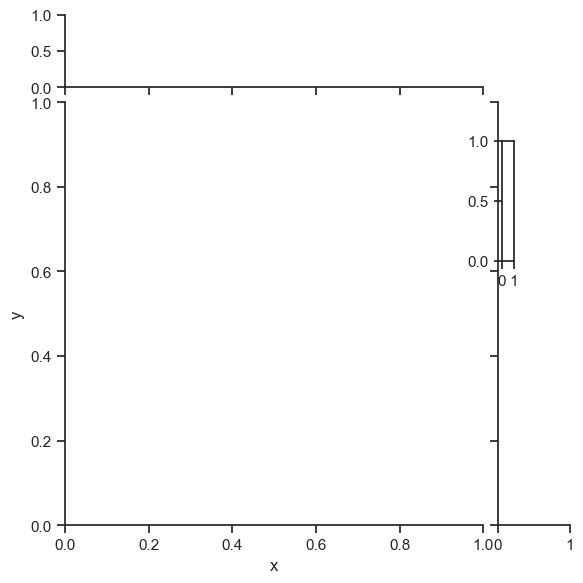

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

sns.set_theme(style="ticks")

# 1) 定义自定义Colormap: 从天蓝(#87CEEB)到粉色(#FFC0CB)
cmap_blue_pink = LinearSegmentedColormap.from_list(
    'blue_pink',
    ['#87CEEB', '#FFC0CB']
)

# 示例函数
def X(x):
    from math import exp, sqrt, pi
    w = [0.3, 0.4, 0.3]
    mu = [1, 3.0, 5.0]
    s = [0.7, 0.7, 0.7]
    total = 0
    for i in range(3):
        total += w[i] * (1 / (sqrt(2 * pi) * s[i])) * exp(-0.5 * ((x - mu[i]) / s[i]) ** 2)
    return total

def Y(y):
    from math import exp, sqrt, pi
    w = [0.4, 0.6]
    mu = [3.0, 1.0]
    s = [1.0, 1.0]
    total = 0
    for j in range(2):
        total += w[j] * (1 / (sqrt(2 * pi) * s[j])) * exp(-0.5 * ((y - mu[j]) / s[j]) ** 2)
    return total

def f2d_func(x, y):
    return X(x) * Y(y)

# 2. 生成网格并计算二维分布（减少网格点数）
Nx, Ny = 40, 40  # 从80减少到40
xs = np.linspace(0, 6, Nx)
ys = np.linspace(0, 6, Ny)

f2d_array = np.zeros((Nx, Ny))
for i, xv in enumerate(xs):
    for j, yv in enumerate(ys):
        f2d_array[i, j] = f2d_func(xv, yv)

# 3. 拼装到一个列表，然后做成 DataFrame，并进行对数转换
data_list = []
for i in range(Nx):
    for j in range(Ny):
        f2d_log = np.log1p(f2d_array[i, j])  # 使用 log1p 避免 log(0)
        temp = {
            'x': xs[i],
            'y': ys[j],
            'f2d': f2d_log
        }
        data_list.append(temp)

df = pd.DataFrame(data_list)
print(df.head())

# 4. Seaborn 作图
g = sns.JointGrid(data=df, x="x", y="y", marginal_ticks=True)

# 设置颜色条的位置
cax = g.figure.add_axes([.85, .55, .02, .2])  # 位置可以根据需要调整

# 在 JointGrid 的主图上画 2D histplot，使用 weights
g.plot_joint(
    sns.histplot,
    weights="f2d",
    bins=[Nx, Ny],
    cmap=cmap_blue_pink,
    pmax=.8,
    cbar=True,
    cbar_ax=cax
)

# 在两边画上 x,y 边际分布，使用 weights 计算边际分布
g.plot_marginals(
    sns.histplot,
    weights="f2d",
    color="#03051A",
    alpha=1,
    bins=20,
    stat='density'
)

plt.show()


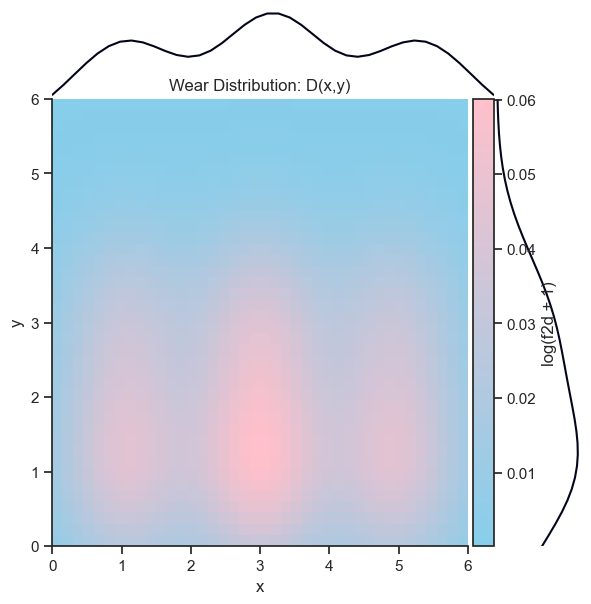

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

sns.set_theme(style="white")

# 生成示例数据（同上）
def X(x):
    from math import exp, sqrt, pi
    w = [0.3, 0.4, 0.3]
    mu= [1, 3.0, 5.0]
    s = [0.7, 0.7, 0.7]
    total = 0
    for i in range(3):
        total += w[i]*(1/(sqrt(2*pi)*s[i]))*exp(-0.5*((x-mu[i])/s[i])**2)
    return total

def Y(y):
    from math import exp, sqrt, pi
    w = [0.4, 0.6]
    mu= [3.0, 1.0]
    s = [1.0, 1.0]
    total = 0
    for j in range(2):
        total += w[j]*(1/(sqrt(2*pi)*s[j]))*exp(-0.5*((y-mu[j])/s[j])**2)
    return total

def f2d_func(x, y):
    return X(x)*Y(y)

Nx, Ny = 80, 80
xs = np.linspace(0, 6, Nx)
ys = np.linspace(0, 6, Ny)

f2d = np.zeros((Nx, Ny))
for i, xv in enumerate(xs):
    for j, yv in enumerate(ys):
        f2d[i, j] = f2d_func(xv, yv)

# 调整数据分布（对数转换）
f2d_log = np.log1p(f2d)  # 使用 log1p 避免 log(0)

# 创建自定义 Colormap（可选）
cmap_blue_pink = LinearSegmentedColormap.from_list(
    'blue_pink',
    ['#87CEEB', '#FFC0CB']
)

# 绘制热力图
plt.figure(figsize=(8, 6))
ax = sns.heatmap(f2d_log.T, cmap='magma', 
                 xticklabels=10, yticklabels=10,
                 cbar_kws={'label': 'log(f2d + 1)'})

sns.jointplot(x=x, y=y, kind="hex", color="#4CB391")
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()
